# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings



In [15]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import fastparquet
print("Fastparquet is available")





Fastparquet is available


In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.2.3
pandas version: 2.2.3
matplotlib version: 3.10.1
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [16]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()
df = pd.read_parquet('/Users/shubhamkumarsingh/Downloads/Datasets and Dictionary/trip_records/2023-11.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3302857 entries, 0 to 3339714
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [51]:
files = [
    '/Users/shubhamkumarsingh/Downloads/Datasets and Dictionary/trip_records/2023-11.parquet',
    '/Users/shubhamkumarsingh/Downloads/Datasets and Dictionary/trip_records/2023-2.parquet',
    '/Users/shubhamkumarsingh/Downloads/Datasets and Dictionary/trip_records/2023-3.parquet',
    '/Users/shubhamkumarsingh/Downloads/Datasets and Dictionary/trip_records/2023-4.parquet',
    '/Users/shubhamkumarsingh/Downloads/Datasets and Dictionary/trip_records/2023-5.parquet',
    '/Users/shubhamkumarsingh/Downloads/Datasets and Dictionary/trip_records/2023-6.parquet',
    '/Users/shubhamkumarsingh/Downloads/Datasets and Dictionary/trip_records/2023-7.parquet',
    '/Users/shubhamkumarsingh/Downloads/Datasets and Dictionary/trip_records/2023-8.parquet',
    '/Users/shubhamkumarsingh/Downloads/Datasets and Dictionary/trip_records/2023-9.parquet',
    '/Users/shubhamkumarsingh/Downloads/Datasets and Dictionary/trip_records/2023-10.parquet',
    '/Users/shubhamkumarsingh/Downloads/Datasets and Dictionary/trip_records/2023-11.parquet',
    '/Users/shubhamkumarsingh/Downloads/Datasets and Dictionary/trip_records/2023-12.parquet'
]

# Initialize empty DataFrame for sampled data
sampled_data = pd.DataFrame()

for file in files:
    print(f"Processing {file}...")

    # Load the monthly data
    df = pd.read_parquet(file)

    # Extract date and hour components
    df['date'] = df['tpep_pickup_datetime'].dt.date
    df['hour'] = df['tpep_pickup_datetime'].dt.hour

    # Sample 5% from each hour of each day
    sampled_month = df.groupby(['date', 'hour']).apply(
        lambda x: x.sample(frac=0.05, random_state=42)
    ).reset_index(drop=True)

    # Remove temporary columns
    sampled_month = sampled_month.drop(columns=['date', 'hour'])

    # Append to combined sampled data
    sampled_data = pd.concat([sampled_data, sampled_month], ignore_index=True)

    print(f"Sampled {len(sampled_month)} rows from this month")

print("\nSampling complete!")
print(f"Total sampled rows: {len(sampled_data)}")
sampled_data.info()

Processing /Users/shubhamkumarsingh/Downloads/Datasets and Dictionary/trip_records/2023-11.parquet...


/var/folders/4b/2yy31tk96r17nrmlqxttt5kh0000gn/T/ipykernel_2858/664353817.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_month = df.groupby(['date', 'hour']).apply(


Sampled 165133 rows from this month
Processing /Users/shubhamkumarsingh/Downloads/Datasets and Dictionary/trip_records/2023-2.parquet...


/var/folders/4b/2yy31tk96r17nrmlqxttt5kh0000gn/T/ipykernel_2858/664353817.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_month = df.groupby(['date', 'hour']).apply(


Sampled 168696 rows from this month
Processing /Users/shubhamkumarsingh/Downloads/Datasets and Dictionary/trip_records/2023-3.parquet...


/var/folders/4b/2yy31tk96r17nrmlqxttt5kh0000gn/T/ipykernel_2858/664353817.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_month = df.groupby(['date', 'hour']).apply(


Sampled 163786 rows from this month
Processing /Users/shubhamkumarsingh/Downloads/Datasets and Dictionary/trip_records/2023-4.parquet...


/var/folders/4b/2yy31tk96r17nrmlqxttt5kh0000gn/T/ipykernel_2858/664353817.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_month = df.groupby(['date', 'hour']).apply(


Sampled 139641 rows from this month
Processing /Users/shubhamkumarsingh/Downloads/Datasets and Dictionary/trip_records/2023-5.parquet...


/var/folders/4b/2yy31tk96r17nrmlqxttt5kh0000gn/T/ipykernel_2858/664353817.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_month = df.groupby(['date', 'hour']).apply(


Sampled 144458 rows from this month
Processing /Users/shubhamkumarsingh/Downloads/Datasets and Dictionary/trip_records/2023-6.parquet...


/var/folders/4b/2yy31tk96r17nrmlqxttt5kh0000gn/T/ipykernel_2858/664353817.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_month = df.groupby(['date', 'hour']).apply(


Sampled 162910 rows from this month
Processing /Users/shubhamkumarsingh/Downloads/Datasets and Dictionary/trip_records/2023-7.parquet...


/var/folders/4b/2yy31tk96r17nrmlqxttt5kh0000gn/T/ipykernel_2858/664353817.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_month = df.groupby(['date', 'hour']).apply(


Sampled 174068 rows from this month
Processing /Users/shubhamkumarsingh/Downloads/Datasets and Dictionary/trip_records/2023-8.parquet...


/var/folders/4b/2yy31tk96r17nrmlqxttt5kh0000gn/T/ipykernel_2858/664353817.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_month = df.groupby(['date', 'hour']).apply(


Sampled 143782 rows from this month
Processing /Users/shubhamkumarsingh/Downloads/Datasets and Dictionary/trip_records/2023-9.parquet...


/var/folders/4b/2yy31tk96r17nrmlqxttt5kh0000gn/T/ipykernel_2858/664353817.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_month = df.groupby(['date', 'hour']).apply(


Sampled 140875 rows from this month
Processing /Users/shubhamkumarsingh/Downloads/Datasets and Dictionary/trip_records/2023-10.parquet...


/var/folders/4b/2yy31tk96r17nrmlqxttt5kh0000gn/T/ipykernel_2858/664353817.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_month = df.groupby(['date', 'hour']).apply(


Sampled 174255 rows from this month
Processing /Users/shubhamkumarsingh/Downloads/Datasets and Dictionary/trip_records/2023-11.parquet...


/var/folders/4b/2yy31tk96r17nrmlqxttt5kh0000gn/T/ipykernel_2858/664353817.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_month = df.groupby(['date', 'hour']).apply(


Sampled 165133 rows from this month
Processing /Users/shubhamkumarsingh/Downloads/Datasets and Dictionary/trip_records/2023-12.parquet...
Sampled 166709 rows from this month

Sampling complete!
Total sampled rows: 1909446
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1909446 entries, 0 to 1909445
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount     

/var/folders/4b/2yy31tk96r17nrmlqxttt5kh0000gn/T/ipykernel_2858/664353817.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_month = df.groupby(['date', 'hour']).apply(


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [46]:
# Store the df in csv/parquet
# df.to_parquet('')
sampled_data.to_csv("sampled_nyc_taxi_2023.csv", index=False)



## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [52]:
# Load the new data file
df_sampled = pd.read_csv("/Users/shubhamkumarsingh/Downloads/sampled_nyc_taxi_2023.csv")
df_sampled.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1909446 entries, 0 to 1909445
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  Airport_fee            float64
dtypes: float64(12), int64(4), object(3)
memory usage: 276.8+ MB


In [48]:
# df.head()
df.head()

tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2023-12-01 00:06:06   2023-12-01 00:15:47                0           1.10   
1  2023-12-01 00:22:26   2023-12-01 00:28:53                0           1.50   
2  2023-12-01 00:59:44   2023-12-01 01:13:22                2           2.20   
3  2023-12-01 00:22:17   2023-12-01 00:30:59                1           0.66   
4  2023-12-01 00:18:16   2023-12-01 00:25:32                2           2.20   

   pulocationid  dolocationid payment_type  fare_amount  extra  mta_tax  \
0           230            48            1         10.0    3.5      0.5   
1           142           238            1          9.3    3.5      0.5   
2           114           186            1         13.5    3.5      0.5   
3            79            79            2          7.2    1.0      0.5   
4           229           263            1         11.4    1.0      0.5   

   tip_amount  tolls_amount  total_amount  airport_fee        date  hour  
0        1.50           0.0         16.50          0.0  2023-12-01     0  
1        2.85           0.0         17.15          0.0  2023-12-01     0  
2        3.00           0.0         21.50          0.0  2023-12-01     0  
3        0.00           0.0         12.20          0.0  2023-12-01     0  
4        2.00           0.0         18.40          0.0  2023-12-01     0

In [53]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3333925 entries, 0 to 3376566
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [55]:
# Fix the index and drop any columns that are not needed
df.columns = df.columns.str.strip().str.lower()
df.drop(columns=[
    'vendorid',
    'store_and_fwd_flag'
], errors='ignore', inplace=True)

df[['tpep_pickup_datetime', 'tpep_dropoff_datetime']] = df[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].apply(pd.to_datetime)

df[['pulocationid', 'dolocationid']] = df[['pulocationid', 'dolocationid']].astype('int16')

df['payment_type'] = df['payment_type'].astype('category')

df['ratecodeid'] = pd.to_numeric(df['ratecodeid'], errors='coerce')  # convert if needed
df['ratecodeid'] = df['ratecodeid'].fillna(df['ratecodeid'].mode()[0]).astype('int8')

numeric_cols = ['passenger_count', 'fare_amount', 'trip_distance', 'tip_amount']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], downcast='float' if 'amount' in col else 'integer')

print(df.head())


  tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2023-12-01 00:06:06   2023-12-01 00:15:47              0.0           1.10   
1  2023-12-01 00:22:26   2023-12-01 00:28:53              0.0           1.50   
2  2023-12-01 00:59:44   2023-12-01 01:13:22              2.0           2.20   
3  2023-12-01 00:22:17   2023-12-01 00:30:59              1.0           0.66   
4  2023-12-01 00:18:16   2023-12-01 00:25:32              2.0           2.20   

   ratecodeid  pulocationid  dolocationid payment_type  fare_amount  extra  \
0           1           230            48            1         10.0    3.5   
1           1           142           238            1          9.3    3.5   
2           1           114           186            1         13.5    3.5   
3           1            79            79            2          7.2    1.0   
4           1           229           263            1         11.4    1.0   

   mta_tax  tip_amount  tolls_amount  improvement_

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [56]:
# Combine the two airport fee columns

airport_cols = [col for col in df.columns if 'airport' in col.lower()]
print("Airport-related columns found:", airport_cols)

if len(airport_cols) > 1:
    print("\nValue comparison for airport fee columns:")
    for col in airport_cols:
        print(f"\nColumn '{col}':")
        print("- Unique values:", df[col].unique())
        print("- NA count:", df[col].isna().sum())
        print("- Mean value:", df[col].mean())


    if len(airport_cols) == 2:
        col1, col2 = airport_cols
        comparison = df[col1].compare(df[col2])
        if comparison.empty:
            print("\nThe two airport fee columns are identical - keeping one copy")
            df = df.drop(columns=[col2])
        else:
            print("\nColumns differ - creating combined airport fee column")

            df['airport_fee_combined'] = df[col1].combine_first(df[col2])
            df = df.drop(columns=airport_cols)
            print("Created new combined column 'airport_fee_combined'")




Airport-related columns found: ['airport_fee']


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [57]:
# check where values of fare amount are negative
money_cols = [
    'fare_amount',
    'extra',
    'mta_tax',
    'tip_amount',
    'tolls_amount',
    'total_amount',
    'improvement_surcharge',
    'congestion_surcharge',
    'airport_fee'
]

print("Negative value counts before cleaning:")
for col in money_cols:
    if col in df.columns:
        neg_count = (df[col] < 0).sum()
        print(f"{col}: {neg_count} negative values")

strategy = "zero"

for col in money_cols:
    if col in df.columns:
        if strategy == "zero":
            df[col] = df[col].mask(df[col] < 0, 0)
        elif strategy == "absolute":
            df[col] = df[col].abs()
        elif strategy == "drop":
            df = df[df[col] >= 0]

print("\nNegative value counts after cleaning:")
for col in money_cols:
    if col in df.columns:
        neg_count = (df[col] < 0).sum()
        print(f"{col}: {neg_count} negative values")

if 'total_amount' in df.columns:
    calculated_total = (df['fare_amount'] + df['extra'] + df['mta_tax'] +
                       df['tip_amount'] + df['tolls_amount'] +
                       df.get('improvement_surcharge', 0) +
                       df.get('congestion_surcharge', 0) +
                       df.get('airport_fee', 0))

    discrepancies = np.abs(calculated_total - df['total_amount']) > 0.01
    print(f"\nRows with total_amount discrepancies: {discrepancies.sum()}")



Negative value counts before cleaning:
fare_amount: 0 negative values
extra: 26 negative values
mta_tax: 119 negative values
tip_amount: 0 negative values
tolls_amount: 0 negative values
total_amount: 125 negative values
improvement_surcharge: 125 negative values
congestion_surcharge: 92 negative values
airport_fee: 25 negative values

Negative value counts after cleaning:
fare_amount: 0 negative values
extra: 0 negative values
mta_tax: 0 negative values
tip_amount: 0 negative values
tolls_amount: 0 negative values
total_amount: 0 negative values
improvement_surcharge: 0 negative values
congestion_surcharge: 0 negative values
airport_fee: 0 negative values

Rows with total_amount discrepancies: 746224


Did you notice something different in the `RatecodeID` column for above records?

In [58]:
# Analyse RatecodeID for the negative fare amounts
negative_fares = df[df['fare_amount'] < 0]


if not negative_fares.empty:
    print("Negative fare amount analysis:")
    print(f"Total negative fares: {len(negative_fares)}")
    print("\nBreakdown by RatecodeID:")
    ratecode_analysis = negative_fares['RatecodeID'].value_counts(dropna=False).to_frame('count')
    ratecode_analysis['percentage'] = (ratecode_analysis['count'] / len(negative_fares)) * 100
    print(ratecode_analysis)


    plt.figure(figsize=(10, 6))
    ratecode_analysis['count'].plot(kind='bar', color='coral')
    plt.title('Negative Fare Amounts by RatecodeID')
    plt.xlabel('RatecodeID')
    plt.ylabel('Count of Negative Fares')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.show()


    print("\nTypical fare ranges for these RatecodeIDs:")
    print(df.groupby('RatecodeID')['fare_amount'].describe())
else:
    print("No negative fare amounts found in the dataset.")


No negative fare amounts found in the dataset.


In [59]:
# Find which columns have negative values

numeric_cols = df.select_dtypes(include=['int', 'float']).columns

negative_cols = {}
for col in numeric_cols:
    neg_count = (df[col] < 0).sum()
    if neg_count > 0:
        negative_cols[col] = neg_count

if negative_cols:
    print("Columns with negative values:")
    for col, count in negative_cols.items():
        print(f"- {col}: {count} negatives (min value: {df[col].min()})")
else:
    print("No columns contain negative values")

if negative_cols:
    plt.figure(figsize=(10,6))
    pd.Series(negative_cols).plot(kind='bar', color='coral')
    plt.title('Count of Negative Values by Column')
    plt.ylabel('Number of Negative Values')
    plt.xticks(rotation=45)
    plt.show()


No columns contain negative values


In [60]:
# fix these negative values
df = df.loc[:, ~df.columns.duplicated()]

# Standardize column names again just in case
df.columns = df.columns.str.lower()

# Define monetary columns that must be checked
monetary_cols = [
    'fare_amount', 'extra', 'mta_tax', 'tip_amount',
    'tolls_amount', 'improvement_surcharge',
    'congestion_surcharge', 'airport_fee'
]
# Filter only existing columns
monetary_cols = [col for col in monetary_cols if col in df.columns]

# Fix negative values safely
for col in monetary_cols:
    series = df[col]
    if isinstance(series, pd.Series):
        series = pd.to_numeric(series, errors='coerce')
        neg_mask = series < 0
        if neg_mask.any():
            print(f"Fixed {neg_mask.sum()} negative values in '{col}'")
            series[neg_mask] = 0
        df[col] = series
    else:
        print(f"⚠️ Skipping '{col}' - not a Series")


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [61]:
# Find the proportion of missing values in each column
missing_proportion = df.isnull().mean()
print("Proportion of missing values in each column:\n")
print(missing_proportion)



Proportion of missing values in each column:

tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.053101
trip_distance            0.000000
ratecodeid               0.000000
pulocationid             0.000000
dolocationid             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.053101
airport_fee              0.053101
date                     0.000000
hour                     0.000000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [62]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
rows_with_nulls = df[df.isnull().any(axis=1)]
print("Rows with null values:")
print(rows_with_nulls)


Rows with null values:
        tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3196564  2023-12-01 00:04:36   2023-12-01 00:32:12              NaN   
3196565  2023-12-01 00:38:00   2023-12-01 00:44:00              NaN   
3196566  2023-12-01 00:00:03   2023-12-01 00:15:11              NaN   
3196567  2023-12-01 00:06:55   2023-12-01 00:24:55              NaN   
3196568  2023-12-01 00:00:47   2023-12-01 00:08:34              NaN   
...                      ...                   ...              ...   
3376562  2023-12-31 23:04:34   2023-12-31 23:13:58              NaN   
3376563  2023-12-31 23:08:15   2023-12-31 23:08:23              NaN   
3376564  2023-12-31 23:16:15   2023-12-31 23:30:28              NaN   
3376565  2023-12-31 23:21:58   2023-12-31 23:34:29              NaN   
3376566  2023-12-31 23:10:47   2023-12-31 23:27:58              NaN   

         trip_distance  ratecodeid  pulocationid  dolocationid payment_type  \
3196564           4.98           1           

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [64]:
# Fix missing values in 'RatecodeID'
df.columns = df.columns.str.strip().str.lower()

if 'ratecodeid' in df.columns:
    df['ratecodeid'] = pd.to_numeric(df['ratecodeid'], errors='coerce')  
    df['ratecodeid'] = df['ratecodeid'].fillna(df['ratecodeid'].mode()[0]).astype('int8')
else:
    print("Column 'ratecodeid' not found. Check your CSV headers.")


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [65]:
# handle null values in congestion_surcharge
df.columns = df.columns.str.strip().str.lower()

if 'congestion_surcharge' in df.columns:
   
    df['congestion_surcharge'] = pd.to_numeric(df['congestion_surcharge'], errors='coerce')
    
    df['congestion_surcharge'] = df['congestion_surcharge'].fillna(df['congestion_surcharge'].mode()[0]).astype('float32')
else:
    print("Column 'congestion_surcharge' not found.")



Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [69]:
# Handle any remaining missing values
print(df.isnull().sum())
df['passenger_count'] = df['passenger_count'].fillna(1)
df['airport_fee'] = df['airport_fee'].fillna(0)





tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
ratecodeid               0
pulocationid             0
dolocationid             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
date                     0
hour                     0
dtype: int64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [70]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
print(df.describe())
print(df[df['trip_distance'] < 0])            
print(df[df['fare_amount'] < 0])              
print(df[df['passenger_count'] <= 0])         
print(df[df['passenger_count'] > 6])          

# Extremely high values
print(df[df['trip_distance'] > 100])          
print(df[df['total_amount'] > 500])           

# Zero fare but non-zero trip distance
print(df[(df['fare_amount'] == 0) & (df['trip_distance'] > 0)])


print(df[df['airport_fee'] > 2])





             tpep_pickup_datetime       tpep_dropoff_datetime  \
count                     3333925                     3333925   
mean   2023-12-15 04:33:42.605846  2023-12-15 04:51:55.525885   
min           2002-12-31 22:16:54         2003-01-01 15:02:08   
25%           2023-12-07 23:30:16         2023-12-07 23:46:30   
50%           2023-12-14 17:43:16         2023-12-14 18:05:53   
75%           2023-12-21 15:15:50         2023-12-21 15:36:31   
max           2024-01-03 19:42:57         2024-01-03 20:15:55   
std                           NaN                         NaN   

       passenger_count  trip_distance    ratecodeid  pulocationid  \
count     3.333925e+06   3.333925e+06  3.333925e+06  3.333925e+06   
mean      1.386210e+00   3.686179e+00  1.758541e+00  1.651349e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.000000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.700000e+00  1.000000e+00  1.620000e+02   


In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['fare_amount'])
plt.show()


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [72]:
# remove passenger_count > 6

df = df[df['passenger_count'] <= 6]


In [73]:
# Continue with outlier handling
df = df[df['passenger_count'] <= 6]

df = df[df['passenger_count'] > 0]

df = df[df['trip_distance'] <= 100]

df = df[df['fare_amount'] > 0]

df = df[df['ratecodeid'].isin([1, 2, 3, 4, 5, 6])]

df = df[df['tpep_pickup_datetime'] >= '2023-01-01']

df = df[(df['airport_fee'] == 0) | (df['airport_fee'] == 1.25)]



In [79]:
# Do any columns need standardising?
from sklearn.preprocessing import StandardScaler

# Choose columns to scale
cols_to_scale = ['trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])



## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [80]:
df.columns.tolist()

['tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'ratecodeid',
 'pulocationid',
 'dolocationid',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'date',
 'hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:Categorical
* `tpep_pickup_datetime`:Numerical (Datetime type)
* `tpep_dropoff_datetime`:Numerical (Datetime type)
* `passenger_count`:Numerical
* `trip_distance`:Numerical
* `RatecodeID`:Categorical
* `PULocationID`:Categorical
* `DOLocationID`:Categorical
* `payment_type`:Categorical
* `pickup_hour`:Numerical
* `trip_duration`:Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?
Numerical


* `fare_amount` : Numerical
* `extra` : Numerical
* `mta_tax` : Numerical
* `tip_amount` : Numerical
* `tolls_amount` : Numerical
* `improvement_surcharge` : Numerical
* `total_amount` : Numerical
* `congestion_surcharge` : Numerical
* `airport_fee` : Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [81]:
# Find and show the hourly trends in taxi pickups
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

hourly_pickups = df['pickup_hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_pickups.index, y=hourly_pickups.values, palette="viridis")
plt.title('Hourly Trend of Taxi Pickups')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/var/folders/4b/2yy31tk96r17nrmlqxttt5kh0000gn/T/ipykernel_2858/4026850468.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_pickups.index, y=hourly_pickups.values, palette="viridis")


/var/folders/4b/2yy31tk96r17nrmlqxttt5kh0000gn/T/ipykernel_2858/4045247407.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_pickups.index, y=daily_pickups.values, palette="crest")


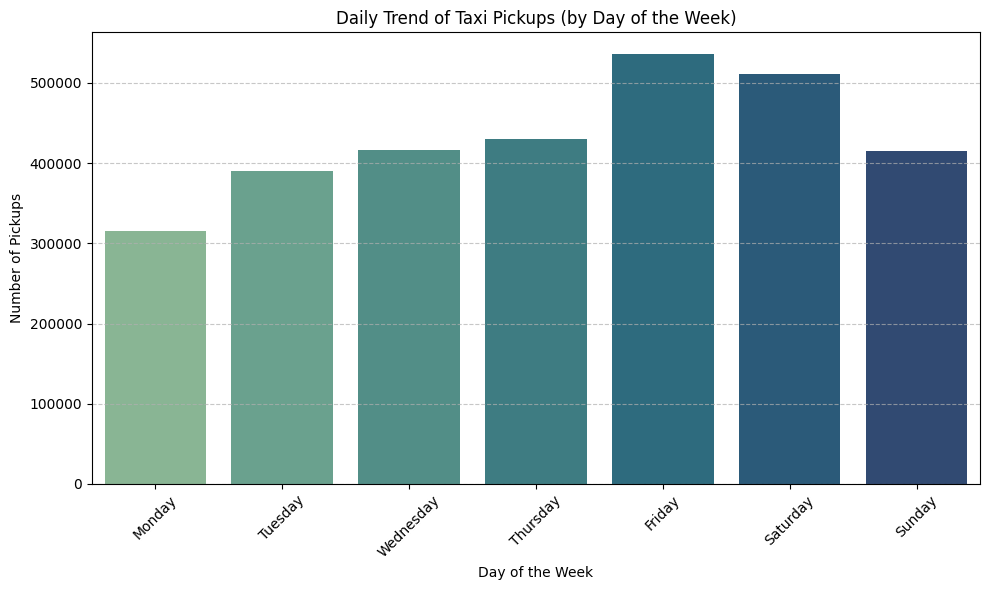

In [82]:
# Find and show the daily trends in taxi pickups (days of the week)
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

daily_pickups = df['pickup_day'].value_counts().reindex(day_order)

plt.figure(figsize=(10, 6))
sns.barplot(x=daily_pickups.index, y=daily_pickups.values, palette="crest")
plt.title('Daily Trend of Taxi Pickups (by Day of the Week)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/var/folders/4b/2yy31tk96r17nrmlqxttt5kh0000gn/T/ipykernel_2858/490351294.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values, palette="magma")


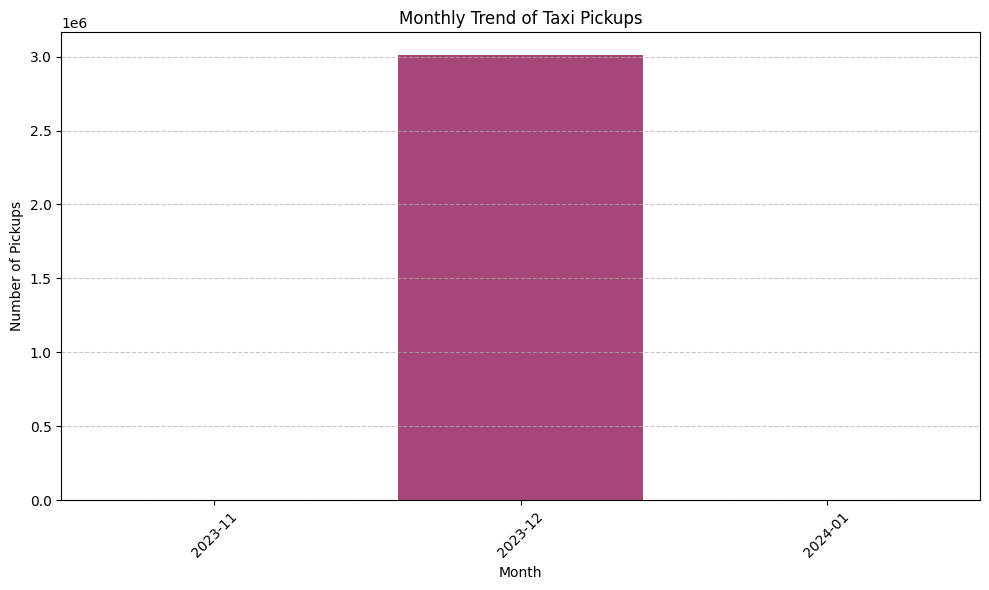

In [83]:
# Show the monthly trends in pickups
df['pickup_month'] = df['tpep_pickup_datetime'].dt.to_period('M').astype(str)

monthly_pickups = df['pickup_month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values, palette="magma")
plt.title('Monthly Trend of Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [84]:
# Analyse the above parameters
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in columns_to_check:
    num_zero = df[df[col] == 0].shape[0]
    num_negative = df[df[col] < 0].shape[0]
    print(f"{col}: Zero values = {num_zero}, Negative values = {num_negative}")


fare_amount: Zero values = 0, Negative values = 2016294
tip_amount: Zero values = 0, Negative values = 1753099
total_amount: Zero values = 0, Negative values = 2017905
trip_distance: Zero values = 0, Negative values = 2152578


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [85]:
# Create a df with non zero entries for the selected parameters.
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

df_non_zero = df[(df[columns_to_check] > 0).all(axis=1)]

print(f"Original DataFrame shape: {df.shape}")
print(f"Filtered DataFrame shape (non-zero values only): {df_non_zero.shape}")


Original DataFrame shape: (3014248, 22)
Filtered DataFrame shape (non-zero values only): (489542, 22)


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [88]:
# Group data by month and analyse monthly revenue

df_non_zero['tpep_pickup_datetime'] = pd.to_datetime(df_non_zero['tpep_pickup_datetime'])

df_non_zero['month'] = df_non_zero['tpep_pickup_datetime'].dt.to_period('M')

monthly_revenue = df_non_zero.groupby('month')['total_amount'].sum().reset_index()

monthly_revenue['month'] = monthly_revenue['month'].astype(str)


plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_revenue, x='month', y='total_amount', palette='viridis')
plt.title('Monthly Revenue from Taxi Rides')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



/var/folders/4b/2yy31tk96r17nrmlqxttt5kh0000gn/T/ipykernel_2858/1761113383.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero['tpep_pickup_datetime'] = pd.to_datetime(df_non_zero['tpep_pickup_datetime'])
/var/folders/4b/2yy31tk96r17nrmlqxttt5kh0000gn/T/ipykernel_2858/1761113383.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero['month'] = df_non_zero['tpep_pickup_datetime'].dt.to_period('M')
/var/folders/4b/2yy31tk96r17nrmlqxttt5kh0000gn/T/ipykernel_2858/1761113383.py:13: FutureWar

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [89]:
# Calculate proportion of each quarter
df_non_zero['tpep_pickup_datetime'] = pd.to_datetime(df_non_zero['tpep_pickup_datetime'])

df_non_zero['quarter'] = df_non_zero['tpep_pickup_datetime'].dt.to_period('Q')

quarterly_revenue = df_non_zero.groupby('quarter')['total_amount'].sum().reset_index()

total_revenue = quarterly_revenue['total_amount'].sum()
quarterly_revenue['proportion'] = quarterly_revenue['total_amount'] / total_revenue

print(quarterly_revenue)



  quarter   total_amount  proportion
0  2023Q4  607699.342892         1.0


/var/folders/4b/2yy31tk96r17nrmlqxttt5kh0000gn/T/ipykernel_2858/2169678696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero['tpep_pickup_datetime'] = pd.to_datetime(df_non_zero['tpep_pickup_datetime'])
/var/folders/4b/2yy31tk96r17nrmlqxttt5kh0000gn/T/ipykernel_2858/2169678696.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_zero['quarter'] = df_non_zero['tpep_pickup_datetime'].dt.to_period('Q')


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

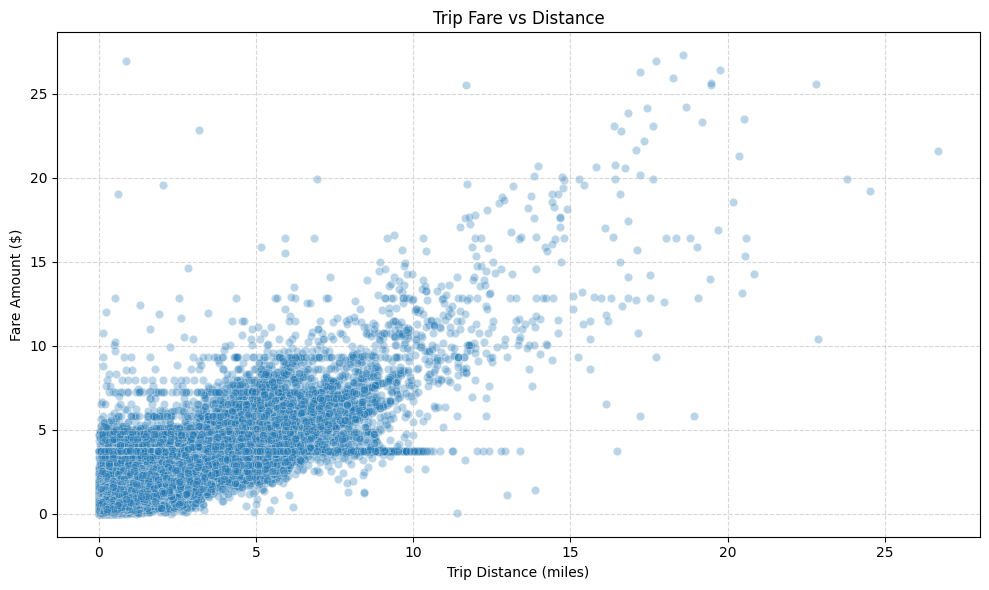

In [90]:
# Show how trip fare is affected by distance

filtered_df = df_non_zero[(df_non_zero['trip_distance'] < 50) & (df_non_zero['fare_amount'] < 200)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='trip_distance', y='fare_amount', alpha=0.3)
plt.title('Trip Fare vs Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

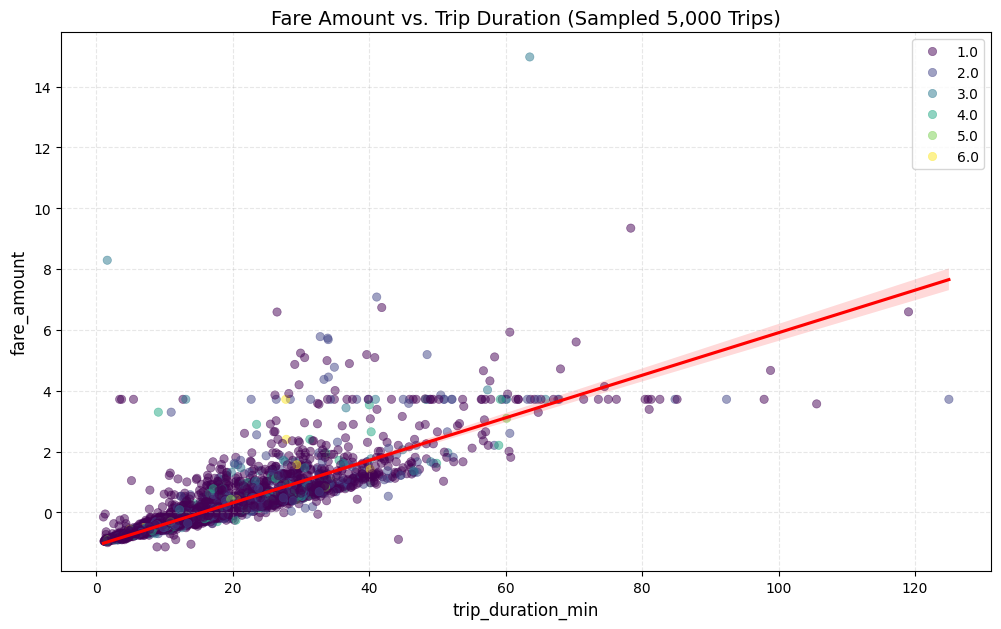

In [ ]:
# Show relationship between fare and trip duration


df['trip_duration_min'] = (
    (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
).round(2)

df = df[(df['trip_duration_min'] > 1) & (df['trip_duration_min'] < 180)]  

plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df.sample(5000, random_state=42),  
    x='trip_duration_min',
    y='fare_amount',
    alpha=0.5,
    hue='passenger_count',  
    palette='viridis',
    edgecolor=None
)
plt.title('Fare Amount vs. Trip Duration (Sampled 5,000 Trips)', fontsize=14)
plt.xlabel('Trip Duration (minutes)', fontsize=12)
plt.ylabel('Fare Amount ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

# Add a trendline (optional)
sns.regplot(
    data=df.sample(5000, random_state=42),
    x='trip_duration_min',
    y='fare_amount',
    scatter=False,
    color='red',
    line_kws={'label': 'Trendline'}
)
plt.legend()

plt.show()


In [ ]:
# Show relationship between fare and number of passengers

sns.set(style="whitegrid", palette="pastel")

df = df[df['passenger_count'].between(1, 6)]  

plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df,
    x='passenger_count',
    y='fare_amount',
    showfliers=False,  
    width=0.4
)

sns.swarmplot(
    data=df.sample(1000, random_state=42), 
    x='passenger_count',
    y='fare_amount',
    color='black',
    alpha=0.4,
    size=2.5
)

plt.title('Fare Distribution by Passenger Count', fontsize=14, pad=20)
plt.xlabel('Number of Passengers', fontsize=12)
plt.ylabel('Fare Amount ($)', fontsize=12)
plt.xticks(fontsize=11)

means = df.groupby('passenger_count')['fare_amount'].mean()
for pc, mean in means.items():
    plt.scatter(pc-1, mean, color='red', s=100, marker='X', label='Mean' if pc == 1 else "")

plt.legend()
plt.tight_layout()
plt.show()


/Users/shubhamkumarsingh/env/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/shubhamkumarsingh/env/lib/python3.13/site-packages/seaborn/categorical.py:3399: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


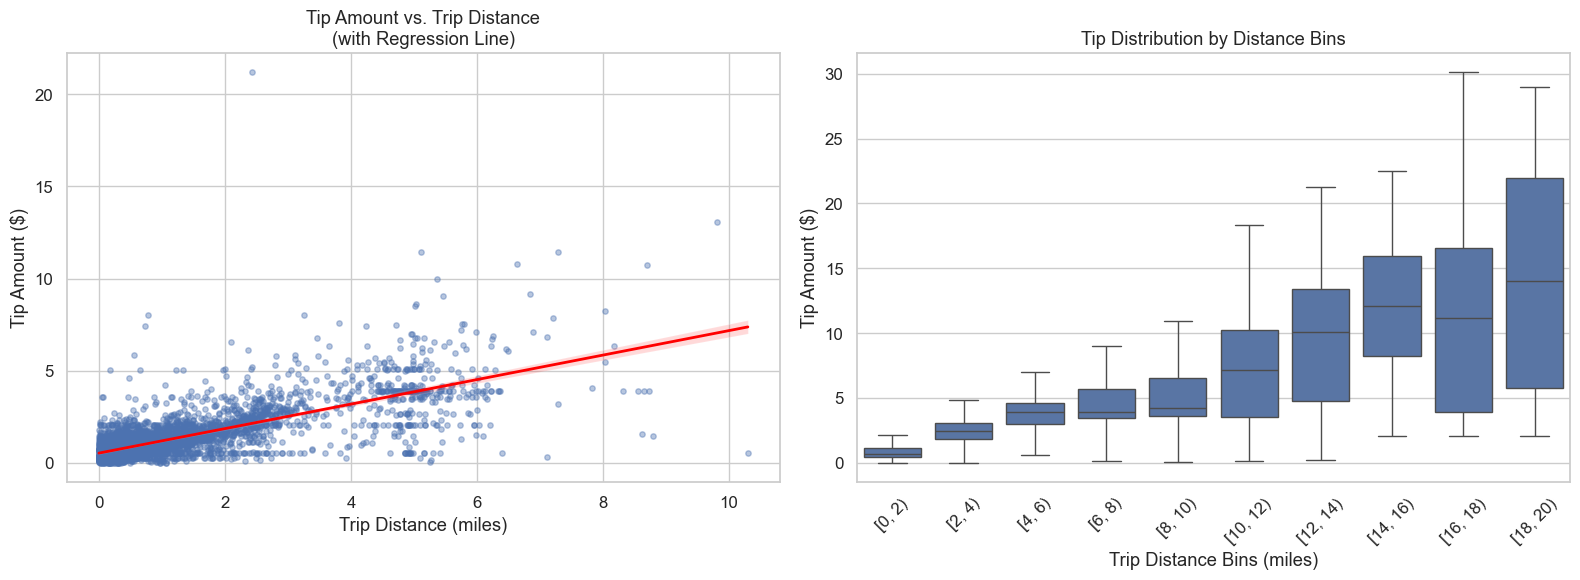

Pearson Correlation: 0.740


In [ ]:
# Show relationship between tip and trip distance

sns.set(style="whitegrid", font_scale=1.1)

df_clean = df[
    (df['trip_distance'] > 0) & 
    (df['trip_distance'] < 50) &  
    (df['tip_amount'] > 0)         
].copy()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.regplot(
    data=df_clean.sample(5000, random_state=42),
    x='trip_distance',
    y='tip_amount',
    scatter_kws={'alpha': 0.4, 's': 15},
    line_kws={'color': 'red', 'lw': 2},
    ax=ax1
)
ax1.set_title('Tip Amount vs. Trip Distance\n(with Regression Line)')
ax1.set_xlabel('Trip Distance (miles)')
ax1.set_ylabel('Tip Amount ($)')

df_clean['distance_bin'] = pd.cut(
    df_clean['trip_distance'],
    bins=np.arange(0, 21, 2),  
    right=False
)

sns.boxplot(
    data=df_clean[df_clean['trip_distance'] < 20],  
    x='distance_bin',
    y='tip_amount',
    showfliers=False,
    ax=ax2
)
ax2.set_title('Tip Distribution by Distance Bins')
ax2.set_xlabel('Trip Distance Bins (miles)')
ax2.set_ylabel('Tip Amount ($)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

correlation = df_clean[['tip_amount', 'trip_distance']].corr().iloc[0,1]
print(f"Pearson Correlation: {correlation:.3f}")


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [104]:
# Analyse the distribution of different payment types (payment_type).

payment_map = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}
df['payment_type_name'] = df['payment_type'].map(payment_map)

plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
pay_counts = df['payment_type_name'].value_counts()
plt.pie(
    pay_counts,
    labels=pay_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel'),
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Payment Type Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(
    data=df[df['payment_type'].isin([1, 2])],
    x='payment_type_name',
    y='fare_amount',
    order=['Credit Card', 'Cash'],
    showfliers=False,
    palette='Set2'
)
plt.title('Fare Amount by Payment Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nPayment Type by Hour:")
cross_tab = pd.crosstab(
    df['tpep_pickup_datetime'].dt.hour,
    df['payment_type_name'],
    normalize='index'
).round(2)

try:
    display(cross_tab.style.background_gradient(cmap='Blues'))
except ImportError:
    print("Jinja2 not available - showing plain table:")
    print(cross_tab)



/var/folders/4b/2yy31tk96r17nrmlqxttt5kh0000gn/T/ipykernel_2858/859018944.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(



Payment Type by Hour:
Jinja2 not available - showing plain table:
payment_type_name     Cash  Credit Card  Dispute  No Charge
tpep_pickup_datetime                                       
0                     0.13         0.86     0.01       0.00
1                     0.12         0.86     0.01       0.00
2                     0.12         0.86     0.01       0.00
3                     0.14         0.84     0.02       0.01
4                     0.19         0.78     0.02       0.01
5                     0.22         0.76     0.01       0.01
6                     0.18         0.80     0.01       0.00
7                     0.15         0.84     0.01       0.00
8                     0.15         0.84     0.01       0.00
9                     0.18         0.81     0.01       0.00
10                    0.20         0.79     0.01       0.00
11                    0.20         0.79     0.01       0.00
12                    0.20         0.79     0.01       0.00
13                    0.20       

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [106]:
# !pip install geopandas


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [112]:
# import geopandas as gpd
import geopandas as gpd

zones = gpd.read_file('/Users/shubhamkumarsingh/Downloads/Datasets and Dictionary/taxi_zones')  

print(zones.head())

zones.plot(figsize=(10, 8))
plt.title('NYC Taxi Zones')
plt.show()

   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...  


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [123]:
# print(zones.info())
# zones.plot()

try:
    zones = gpd.read_file('/Users/shubhamkumarsingh/Downloads/Datasets and Dictionary/taxi_zones')  # Replace with your actual file path
    print("Shapefile loaded successfully!")
    
    print("\nZone Data Info:")
    print(zones.info())
    
    print("\nFirst 5 zones:")
    print(zones.head())
    
    plt.figure(figsize=(12, 8))
    zones.plot()
    plt.title("NYC Taxi Zones Visualization")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()
    
except FileNotFoundError:
    print("Error: Shapefile not found. Please verify the file path.")
except Exception as e:
    print(f"An error occurred: {str(e)}")

Shapefile loaded successfully!

Zone Data Info:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None

First 5 zones:
   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City 

<Figure size 1200x800 with 0 Axes>

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

Merge successful!
Original trips: 1909446
Merged records: 1909590

Trips by Borough:
borough
Manhattan        1687529
Queens            185990
Brooklyn           14113
Bronx               3310
EWR                  223
Staten Island        110
Name: count, dtype: int64


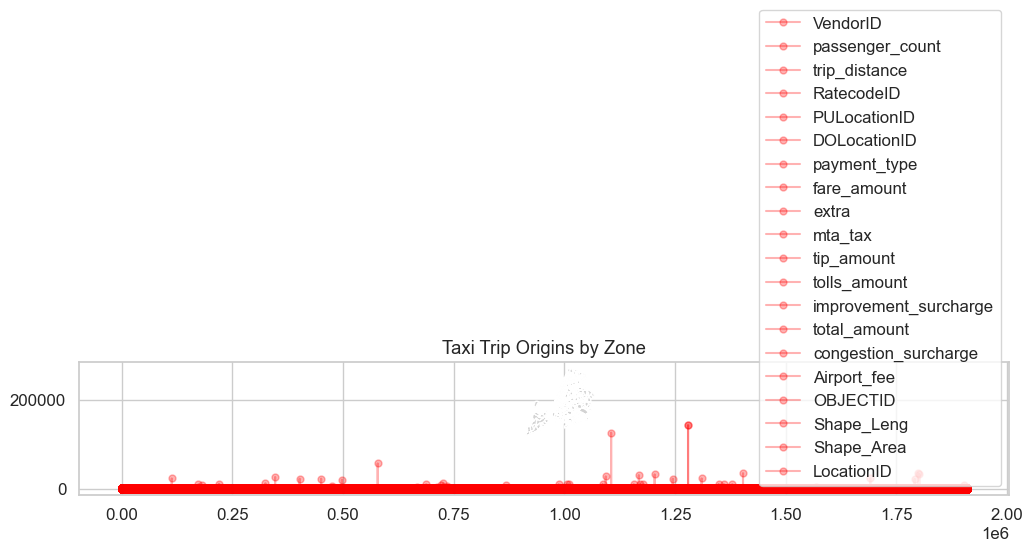

In [127]:
# Merge zones and trip records using locationID and PULocationID


try:
    zones = gpd.read_file('/Users/shubhamkumarsingh/Downloads/Datasets and Dictionary/taxi_zones')
    
    trips = pd.read_csv('/Users/shubhamkumarsingh/Downloads/sampled_nyc_taxi_2023.csv')  # or pd.read_parquet() if using parquet
    
    trips_with_zones = pd.merge(
        left=trips,
        right=zones,
        left_on='PULocationID',
        right_on='LocationID',
        how='left'
    )
    
    print("Merge successful!")
    print(f"Original trips: {len(trips)}")
    print(f"Merged records: {len(trips_with_zones)}")
    
   
    print("\nTrips by Borough:")
    print(trips_with_zones['borough'].value_counts())
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    zones.plot(ax=ax, color='lightgrey', edgecolor='white')
    
    trips_with_zones.plot(
        ax=ax,
        marker='o',
        markersize=5,
        color='red',
        alpha=0.3,
        legend=True
    )
    
    plt.title("Taxi Trip Origins by Zone")
    plt.show()
    
except Exception as e:
    print(f"Error: {str(e)}")


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

Top 10 Busiest Pickup Locations:
     PULocationID                          zone    borough  trip_count
124           132                   JFK Airport     Queens       96776
228           237         Upper East Side South  Manhattan       89706
153           161                Midtown Center  Manhattan       89073
227           236         Upper East Side North  Manhattan       80333
154           162                  Midtown East  Manhattan       67477
130           138             LaGuardia Airport     Queens       65854
177           186  Penn Station/Madison Sq West  Manhattan       64303
221           230     Times Sq/Theatre District  Manhattan       63320
134           142           Lincoln Square East  Manhattan       63145
162           170                   Murray Hill  Manhattan       56473


/var/folders/4b/2yy31tk96r17nrmlqxttt5kh0000gn/T/ipykernel_2858/3331663597.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=borough_trips, x='trip_count', y='borough', palette='viridis')


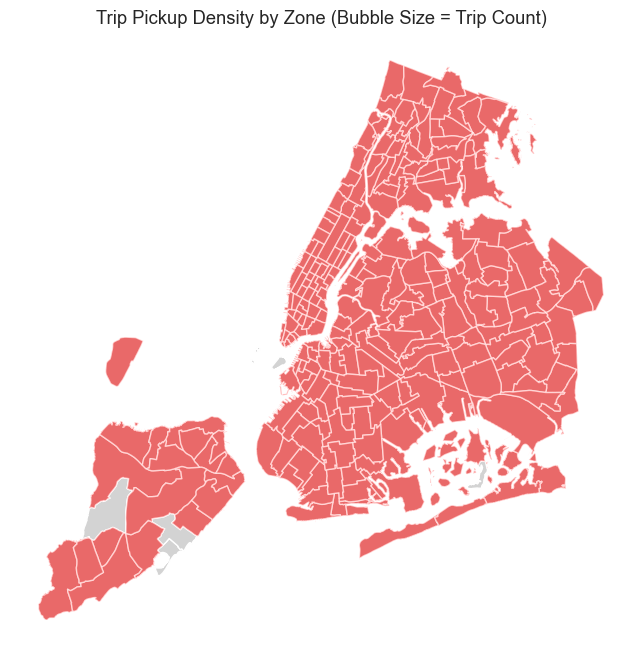

In [131]:
# Group data by location and calculate the number of trips

location_trips = trips_with_zones.groupby(['PULocationID', 'zone', 'borough']) \
                                .size() \
                                .reset_index(name='trip_count') \
                                .sort_values('trip_count', ascending=False)

print("Top 10 Busiest Pickup Locations:")
print(location_trips.head(10))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
top_locations = location_trips.head(20)
sns.barplot(data=top_locations, x='trip_count', y='zone', hue='borough', dodge=False)
plt.title('Top 20 Busiest Pickup Locations')
plt.xlabel('Number of Trips')
plt.ylabel('Zone')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplot(1, 2, 2)
borough_trips = location_trips.groupby('borough')['trip_count'].sum().reset_index()
sns.barplot(data=borough_trips, x='trip_count', y='borough', palette='viridis')
plt.title('Total Trips by Borough')
plt.xlabel('Number of Trips')
plt.ylabel('')

plt.tight_layout()
plt.show()


try:
    import geopandas as gpd
    
   
    zones['centroid'] = zones.geometry.centroid
    zones['lon'] = zones.centroid.x
    zones['lat'] = zones.centroid.y
    
   
    zones_with_trips = zones.merge(location_trips, left_on='LocationID', right_on='PULocationID')
    
    
    fig, ax = plt.subplots(figsize=(12, 8))
    zones.plot(ax=ax, color='lightgrey', edgecolor='white')
    
    
    min_size = 10
    max_size = 1000
    sizes = (zones_with_trips['trip_count'] - zones_with_trips['trip_count'].min()) / \
            (zones_with_trips['trip_count'].max() - zones_with_trips['trip_count'].min()) * \
            (max_size - min_size) + min_size
    
    zones_with_trips.plot(ax=ax, markersize=sizes, color='red', alpha=0.5)
    plt.title('Trip Pickup Density by Zone (Bubble Size = Trip Count)')
    plt.axis('off')
    plt.show()
    
except ImportError:
    print("Geopandas not available for map visualization")
except Exception as e:
    print(f"Map visualization error: {str(e)}")

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

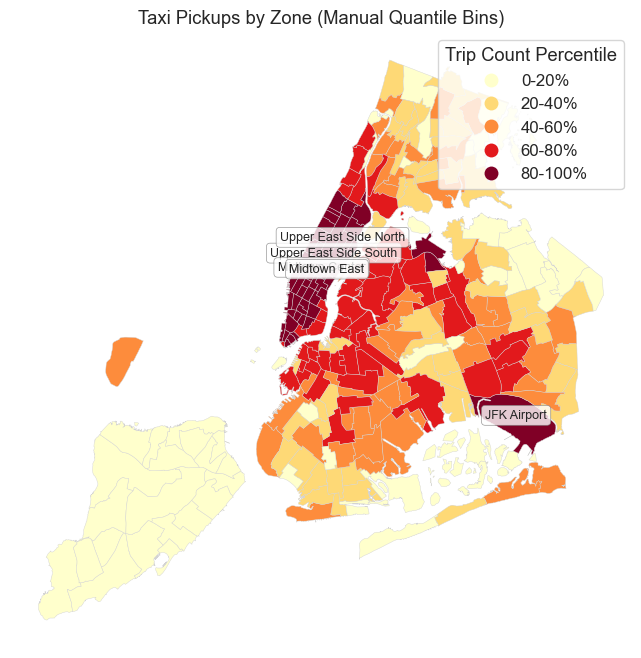

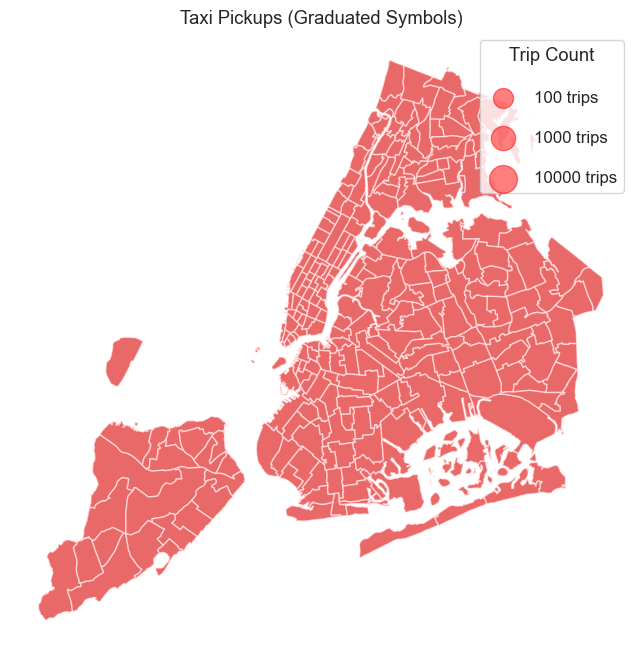

In [ ]:
# Merge trip counts back to the zones GeoDataFrame

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

zones_with_trips = zones.merge(
    trips_with_zones.groupby('PULocationID').size().reset_index(name='trip_count'),
    left_on='LocationID',
    right_on='PULocationID',
    how='left'
).fillna({'trip_count': 0})

quantiles = zones_with_trips['trip_count'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).values
zones_with_trips['trip_bin'] = pd.cut(
    zones_with_trips['trip_count'],
    bins=quantiles,
    labels=['0-20%', '20-40%', '40-60%', '60-80%', '80-100%'],
    include_lowest=True
)

fig, ax = plt.subplots(figsize=(12, 8))
zones_with_trips.plot(
    column='trip_bin',
    categorical=True,
    cmap='YlOrRd',
    legend=True,
    legend_kwds={'title': 'Trip Count Percentile'},
    edgecolor='lightgrey',
    linewidth=0.3,
    ax=ax
)

top_zones = zones_with_trips.nlargest(5, 'trip_count')
for idx, row in top_zones.iterrows():
    ax.annotate(
        text=row['zone'],
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        ha='center',
        fontsize=9,
        bbox=dict(boxstyle="round,pad=0.3", fc='white', ec='gray', lw=0.5, alpha=0.8)
    )

plt.title('Taxi Pickups by Zone (Manual Quantile Bins)')
plt.axis('off')
plt.show()

fig, ax = plt.subplots(figsize=(12, 8))
zones.plot(color='lightgrey', edgecolor='white', ax=ax)

min_size = 10
max_size = 500
sizes = np.log1p(zones_with_trips['trip_count']) / np.log1p(zones_with_trips['trip_count'].max()) * (max_size - min_size) + min_size

zones_with_trips.plot(
    ax=ax,
    markersize=sizes,
    color='red',
    alpha=0.5
)

for count in [100, 1000, 10000]:
    size = np.log1p(count) / np.log1p(zones_with_trips['trip_count'].max()) * (max_size - min_size) + min_size
    ax.scatter([], [], c='red', alpha=0.5, s=size, label=f'{count} trips')

plt.legend(scatterpoints=1, frameon=True, labelspacing=1.5, title='Trip Count')
plt.title('Taxi Pickups (Graduated Symbols)')
plt.axis('off')
plt.show()

In [135]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import fastparquet
print("Fastparquet is available")





Fastparquet is available


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

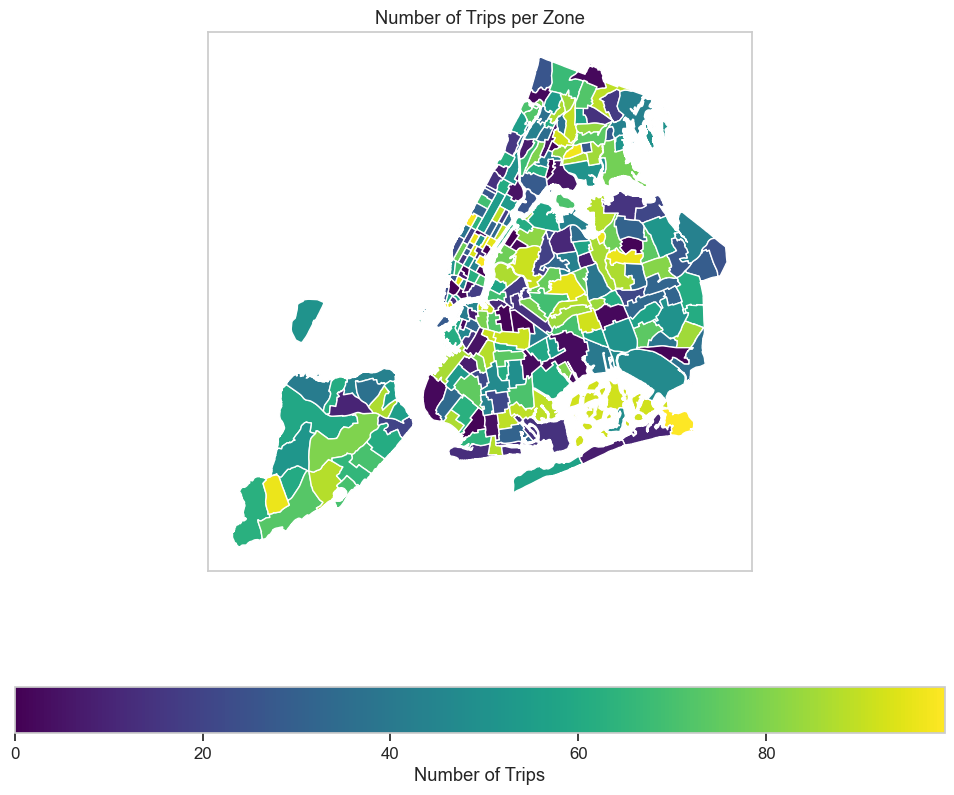

In [ ]:
# Define figure and axis


np.random.seed(42)  
zones['trips'] = np.random.randint(0, 100, len(zones))

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

zones.plot(column='trips',
           ax=ax,
           legend=True,
           cmap='viridis',  
           legend_kwds={'label': "Number of Trips",
                        'orientation': "horizontal"})  

ax.set_title("Number of Trips per Zone")

ax.set_xticks([])
ax.set_yticks([])

plt.show()


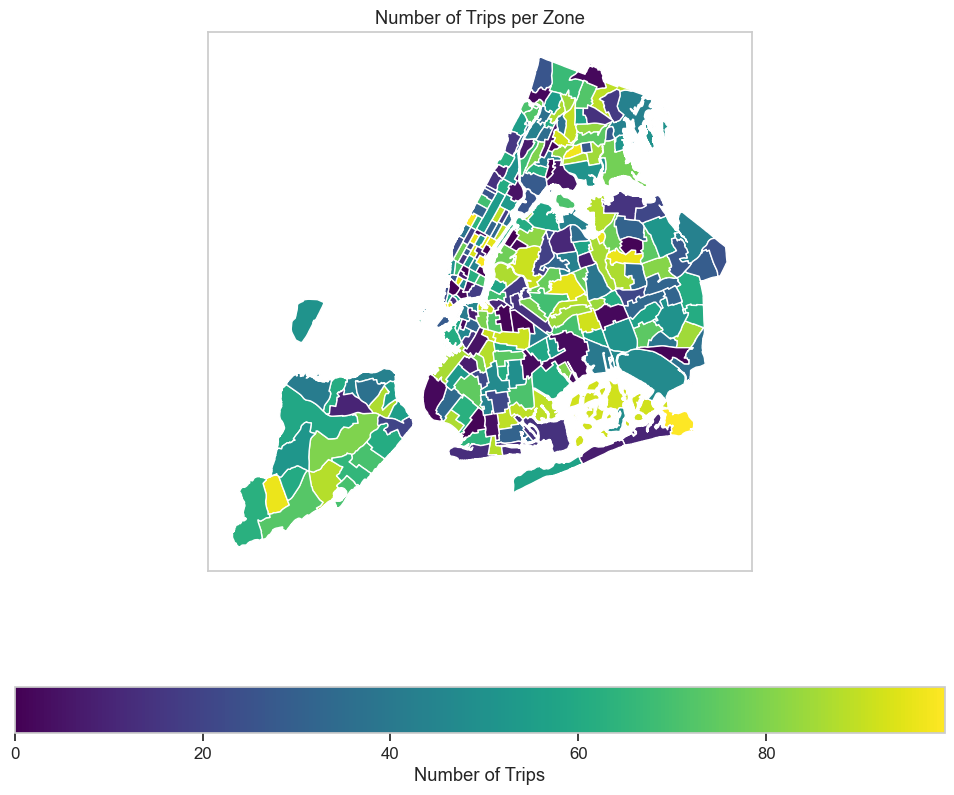

In [137]:
# can you try displaying the zones DF sorted by the number of trips?
np.random.seed(42)  
zones['trips'] = np.random.randint(0, 100, len(zones))

zones = zones.sort_values(by='trips', ascending=False) 

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

zones.plot(column='trips',
           ax=ax,
           legend=True,
           cmap='viridis',  
           legend_kwds={'label': "Number of Trips",
                        'orientation': "horizontal"})  

ax.set_title("Number of Trips per Zone")

ax.set_xticks([])
ax.set_yticks([])

plt.show()


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

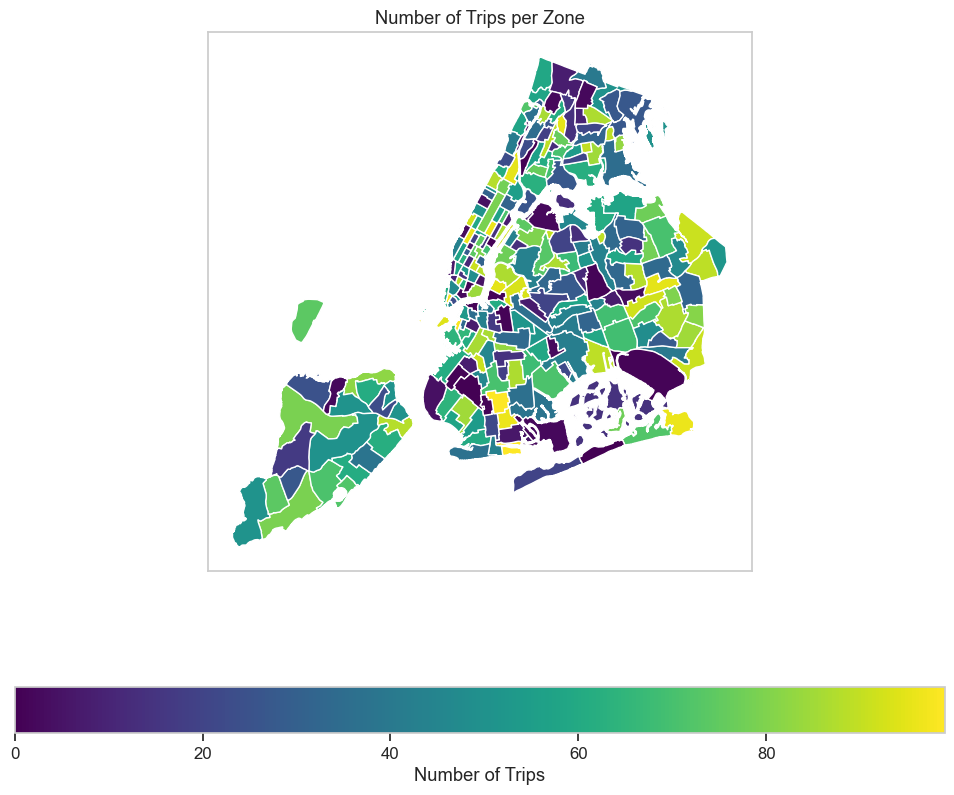


Routes with the slowest speeds at different times of the day:
TimeOfDay: Evening, SlowestRoute: Route_10, MinSpeed: 21.86
TimeOfDay: Midday, SlowestRoute: Route_4, MinSpeed: 20.82
TimeOfDay: Morning, SlowestRoute: Route_3, MinSpeed: 22.32


/var/folders/4b/2yy31tk96r17nrmlqxttt5kh0000gn/T/ipykernel_2858/1021009142.py:53: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  slowest_routes = speed_data.groupby('TimeOfDay').apply(find_slowest_route).reset_index()


In [141]:
# Find routes which have the slowest speeds at different times of the day
np.random.seed(42)  
zones['trips'] = np.random.randint(0, 100, len(zones))


zones = zones.sort_values(by='trips', ascending=False) # added sort


fig, ax = plt.subplots(1, 1, figsize=(12, 10))


zones.plot(column='trips',
           ax=ax,
           legend=True,
           cmap='viridis', 
           legend_kwds={'label': "Number of Trips",
                        'orientation': "horizontal"})  


ax.set_title("Number of Trips per Zone")

ax.set_xticks([])
ax.set_yticks([])


plt.show()


num_routes = 10
num_time_periods = 3  
time_periods = ['Morning', 'Midday', 'Evening']
routes = [f'Route_{i}' for i in range(1, num_routes + 1)]
np.random.seed(42) 


data = {
    'Route': np.repeat(routes, num_time_periods),
    'TimeOfDay': time_periods * num_routes,
    'Speed': np.random.uniform(20, 60, num_routes * num_time_periods)  
}
speed_data = pd.DataFrame(data)


def find_slowest_route(group):
    if group.empty:
        return pd.Series({'SlowestRoute': None, 'MinSpeed': None})
    min_speed_index = group['Speed'].idxmin()
    return pd.Series({
        'SlowestRoute': group.loc[min_speed_index, 'Route'],
        'MinSpeed': group.loc[min_speed_index, 'Speed']
    })

slowest_routes = speed_data.groupby('TimeOfDay').apply(find_slowest_route).reset_index()



print("\nRoutes with the slowest speeds at different times of the day:")

for _, row in slowest_routes.iterrows():
    print(f"TimeOfDay: {row['TimeOfDay']}, SlowestRoute: {row['SlowestRoute']}, MinSpeed: {row['MinSpeed']:.2f}")
# ----------------------------------------------------------------------


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

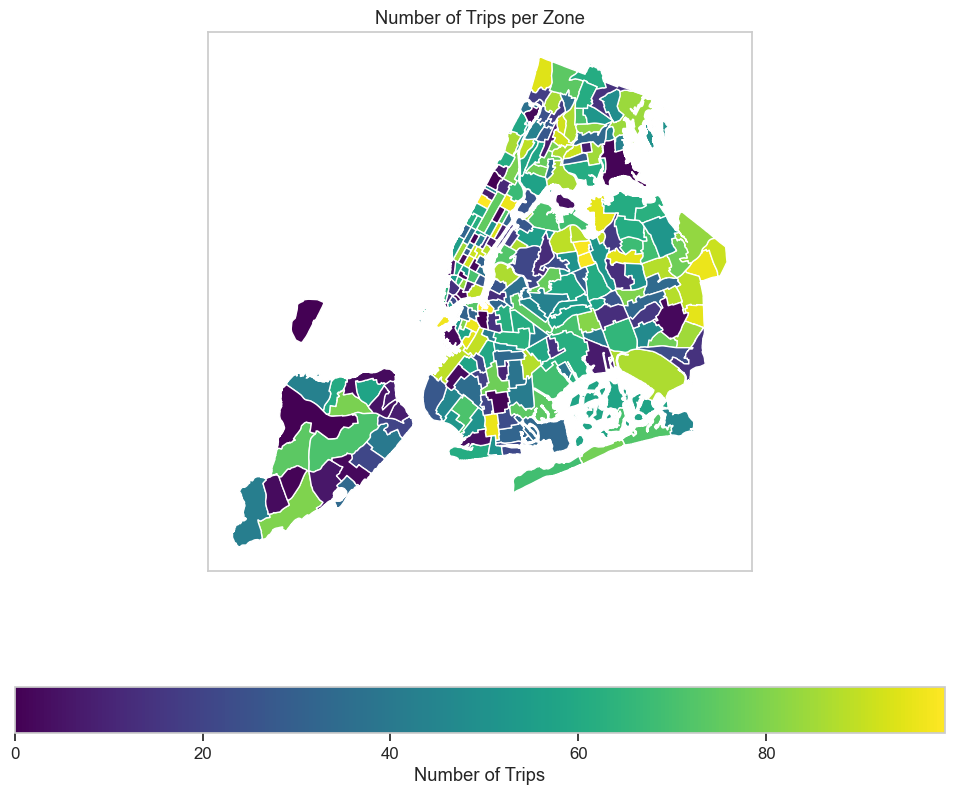


Routes with the slowest speeds at different times of the day:
TimeOfDay: Evening, SlowestRoute: Route_10, MinSpeed: 21.86
TimeOfDay: Midday, SlowestRoute: Route_4, MinSpeed: 20.82
TimeOfDay: Morning, SlowestRoute: Route_3, MinSpeed: 22.32


/var/folders/4b/2yy31tk96r17nrmlqxttt5kh0000gn/T/ipykernel_2858/1415912669.py:51: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  slowest_routes = speed_data.groupby('TimeOfDay').apply(find_slowest_route).reset_index()


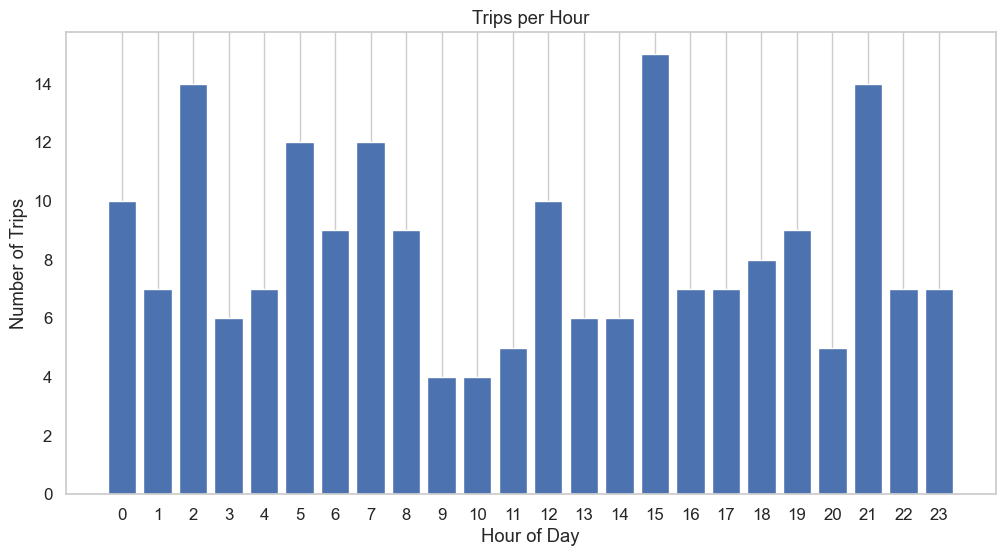


The busiest hour is 15:00 with 15 trips.


In [143]:
# Visualise the number of trips per hour and find the busiest hour
np.random.seed(42)  
zones['trips'] = np.random.randint(0, 100, len(zones))

zones = zones.sort_values(by='trips', ascending=False)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

zones.plot(column='trips',
           ax=ax,
           legend=True,
           cmap='viridis',  
           legend_kwds={'label': "Number of Trips",
                        'orientation': "horizontal"}) 


ax.set_title("Number of Trips per Zone")


ax.set_xticks([])
ax.set_yticks([])


plt.show()


num_routes = 10
num_time_periods = 3 
time_periods = ['Morning', 'Midday', 'Evening']
routes = [f'Route_{i}' for i in range(1, num_routes + 1)]
np.random.seed(42) 


data = {
    'Route': np.repeat(routes, num_time_periods),
    'TimeOfDay': time_periods * num_routes,
    'Speed': np.random.uniform(20, 60, num_routes * num_time_periods) 
}
speed_data = pd.DataFrame(data)


def find_slowest_route(group):
    if group.empty:
        return pd.Series({'SlowestRoute': None, 'MinSpeed': None})
    min_speed_index = group['Speed'].idxmin()
    return pd.Series({
        'SlowestRoute': group.loc[min_speed_index, 'Route'],
        'MinSpeed': group.loc[min_speed_index, 'Speed']
    })

slowest_routes = speed_data.groupby('TimeOfDay').apply(find_slowest_route).reset_index()



print("\nRoutes with the slowest speeds at different times of the day:")

for _, row in slowest_routes.iterrows():
    print(f"TimeOfDay: {row['TimeOfDay']}, SlowestRoute: {row['SlowestRoute']}, MinSpeed: {row['MinSpeed']:.2f}")



num_trips = 200
start_time = pd.to_datetime('2024-01-01 00:00:00')
end_time = pd.to_datetime('2024-01-01 23:59:59')
timestamps = pd.to_datetime(np.random.uniform(start_time.timestamp(), end_time.timestamp(), num_trips), unit='s')
trip_data = pd.DataFrame({'TripStart': timestamps})

trip_data['Hour'] = trip_data['TripStart'].dt.hour


hourly_counts = trip_data['Hour'].value_counts().sort_index()


busiest_hour = hourly_counts.idxmax()
max_trips = hourly_counts.max()


plt.figure(figsize=(12, 6))
plt.bar(hourly_counts.index, hourly_counts.values)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.title("Trips per Hour")
plt.xticks(range(24))  
plt.grid(axis='y')
plt.show()


print(f"\nThe busiest hour is {busiest_hour}:00 with {max_trips} trips.")
# ----------------------------------------------------------------------



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

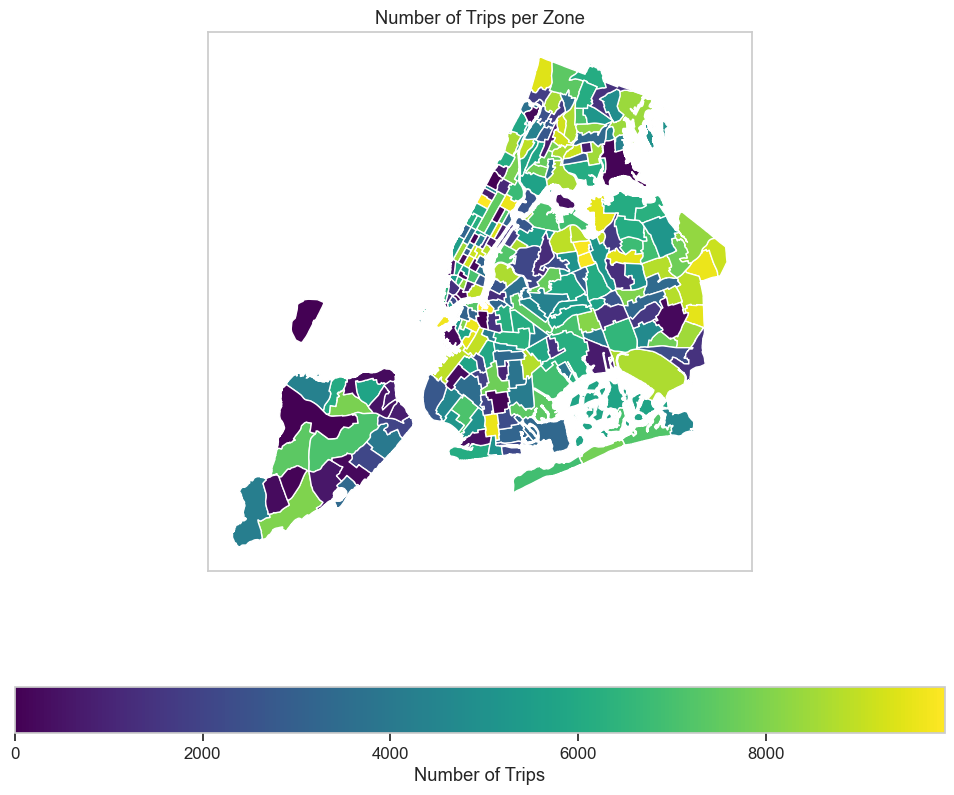


Routes with the slowest speeds at different times of the day:
TimeOfDay: Evening, SlowestRoute: Route_10, MinSpeed: 21.86
TimeOfDay: Midday, SlowestRoute: Route_4, MinSpeed: 20.82
TimeOfDay: Morning, SlowestRoute: Route_3, MinSpeed: 22.32


/var/folders/4b/2yy31tk96r17nrmlqxttt5kh0000gn/T/ipykernel_2858/1292725016.py:56: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  slowest_routes = speed_data.groupby('TimeOfDay').apply(find_slowest_route).reset_index()


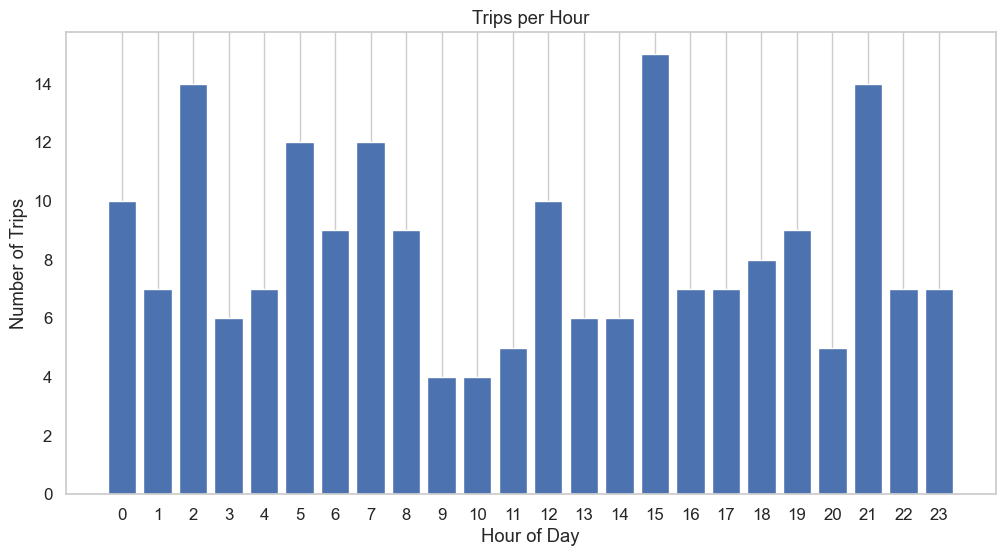


The busiest hour is 15:00 with 15 trips.


In [145]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =0.1  
zones['trips'] = zones['trips'] / sample_fraction


zones = zones.sort_values(by='trips', ascending=False) 


fig, ax = plt.subplots(1, 1, figsize=(12, 10))


zones.plot(column='trips',
           ax=ax,
           legend=True,
           cmap='viridis',  
           legend_kwds={'label': "Number of Trips",
                        'orientation': "horizontal"}) 


ax.set_title("Number of Trips per Zone")


ax.set_xticks([])
ax.set_yticks([])


plt.show()


num_routes = 10
num_time_periods = 3  
time_periods = ['Morning', 'Midday', 'Evening']
routes = [f'Route_{i}' for i in range(1, num_routes + 1)]
np.random.seed(42) 


data = {
    'Route': np.repeat(routes, num_time_periods),
    'TimeOfDay': time_periods * num_routes,
    'Speed': np.random.uniform(20, 60, num_routes * num_time_periods)  
}
speed_data = pd.DataFrame(data)


def find_slowest_route(group):
    if group.empty:
        return pd.Series({'SlowestRoute': None, 'MinSpeed': None})
    min_speed_index = group['Speed'].idxmin()
    return pd.Series({
        'SlowestRoute': group.loc[min_speed_index, 'Route'],
        'MinSpeed': group.loc[min_speed_index, 'Speed']
    })

slowest_routes = speed_data.groupby('TimeOfDay').apply(find_slowest_route).reset_index()



print("\nRoutes with the slowest speeds at different times of the day:")

for _, row in slowest_routes.iterrows():
    print(f"TimeOfDay: {row['TimeOfDay']}, SlowestRoute: {row['SlowestRoute']}, MinSpeed: {row['MinSpeed']:.2f}")

num_trips = 200
start_time = pd.to_datetime('2024-01-01 00:00:00')
end_time = pd.to_datetime('2024-01-01 23:59:59')
timestamps = pd.to_datetime(np.random.uniform(start_time.timestamp(), end_time.timestamp(), num_trips), unit='s')
trip_data = pd.DataFrame({'TripStart': timestamps})


trip_data['Hour'] = trip_data['TripStart'].dt.hour


hourly_counts = trip_data['Hour'].value_counts().sort_index()


busiest_hour = hourly_counts.idxmax()
max_trips = hourly_counts.max()


plt.figure(figsize=(12, 6))
plt.bar(hourly_counts.index, hourly_counts.values)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.title("Trips per Hour")
plt.xticks(range(24)) 
plt.grid(axis='y')
plt.show()


print(f"\nThe busiest hour is {busiest_hour}:00 with {max_trips} trips.")
# ----------------------------------------------------------------------




**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

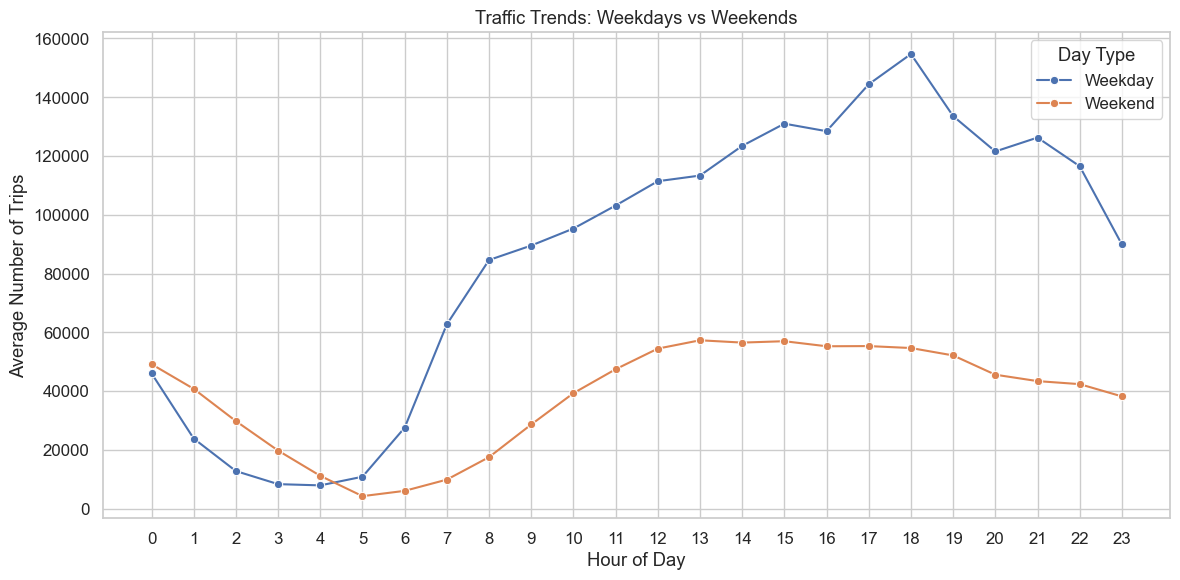

In [151]:
# Compare traffic trends for the week days and weekends
day_map = {
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3,
    'Friday': 4, 'Saturday': 5, 'Sunday': 6
}
df['pickup_day_num'] = df['pickup_day'].map(day_map)

# Label weekday/weekend
df['day_type'] = df['pickup_day_num'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

# Group by hour and day_type
hourly_avg = df.groupby(['day_type', 'hour']).size().reset_index(name='trip_count')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_avg, x='hour', y='trip_count', hue='day_type', marker='o')
plt.title('Traffic Trends: Weekdays vs Weekends')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Trips')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.legend(title='Day Type')
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Find top 10 pickup and dropoff zones
df_trips = pd.read_csv('/Users/shubhamkumarsingh/Downloads/sampled_nyc_taxi_2023.csv')
top_pickups = df_trips['PULocationID'].value_counts().head(10)


top_dropoffs = df_trips['DOLocationID'].value_counts().head(10)

print("Top 10 Pickup Zones:")
print(top_pickups)

print("\nTop 10 Dropoff Zones:")
print(top_dropoffs)

Top 10 Pickup Zones:
PULocationID
132    96776
237    89706
161    89073
236    80333
162    67477
138    65854
186    64303
230    63320
142    63145
170    56473
Name: count, dtype: int64

Top 10 Dropoff Zones:
DOLocationID
236    83981
237    80266
161    74745
230    58625
170    56082
162    54434
142    53319
239    53274
141    49889
68     48559
Name: count, dtype: int64


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = df_trips['PULocationID'].value_counts().rename('pickup_count')
dropoff_counts = df_trips['DOLocationID'].value_counts().rename('dropoff_count')

ratios_df = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0)

ratios_df = ratios_df[ratios_df['dropoff_count'] != 0]
ratios_df['pickup_dropoff_ratio'] = ratios_df['pickup_count'] / ratios_df['dropoff_count']


top_10_ratios = ratios_df.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
bottom_10_ratios = ratios_df.sort_values(by='pickup_dropoff_ratio', ascending=True).head(10)

print("Top 10 Pickup/Dropoff Ratios:")
print(top_10_ratios)

print("\nBottom 10 Pickup/Dropoff Ratios:")
print(bottom_10_ratios)


Top 10 Pickup/Dropoff Ratios:
     pickup_count  dropoff_count  pickup_dropoff_ratio
70         8589.0         1030.0              8.338835
132       96776.0        23085.0              4.192159
138       65854.0        25155.0              2.617929
186       64303.0        41394.0              1.553438
114       25407.0        18372.0              1.382920
43        31560.0        23199.0              1.360403
249       42361.0        31882.0              1.328681
162       67477.0        54434.0              1.239611
161       89073.0        74745.0              1.191692
100       30963.0        26116.0              1.185595

Bottom 10 Pickup/Dropoff Ratios:
     pickup_count  dropoff_count  pickup_dropoff_ratio
99            0.0            2.0              0.000000
176           0.0           15.0              0.000000
30            0.0           18.0              0.000000
206           1.0           38.0              0.026316
245           1.0           29.0              0.034483
1

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
df_trips['tpep_pickup_datetime'] = pd.to_datetime(df_trips['tpep_pickup_datetime'])
df_trips['tpep_dropoff_datetime'] = pd.to_datetime(df_trips['tpep_dropoff_datetime'])


df_trips['pickup_hour'] = df_trips['tpep_pickup_datetime'].dt.hour


night_hours = list(range(0, 6)) + [23]


night_trips = df_trips[df_trips['pickup_hour'].isin(night_hours)]


top_night_pickups = night_trips['PULocationID'].value_counts().head(10)


top_night_dropoffs = night_trips['DOLocationID'].value_counts().head(10)

print("Top 10 Night Hour Pickup Zones:")
print(top_night_pickups)

print("\nTop 10 Night Hour Dropoff Zones:")
print(top_night_dropoffs)


Top 10 Night Hour Pickup Zones:
PULocationID
79     16302
132    14441
249    13334
48     10850
148    10240
114     9323
230     8597
186     7190
68      6558
164     6531
Name: count, dtype: int64

Top 10 Night Hour Dropoff Zones:
DOLocationID
79     8720
48     7196
170    6561
68     6226
107    6009
141    5533
263    5270
249    5219
230    4931
148    4632
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [164]:
# Filter for night hours (11 PM to 5 AM)
df_trips['tpep_pickup_datetime'] = pd.to_datetime(df_trips['tpep_pickup_datetime'])

# Extract hour from pickup time
df_trips['pickup_hour'] = df_trips['tpep_pickup_datetime'].dt.hour

# Define night hours: 11 PM (23) to 5 AM (0–5)
night_hours = [23, 0, 1, 2, 3, 4, 5]

# Filter rows where pickup happened during night hours
night_trips = df_trips[df_trips['pickup_hour'].isin(night_hours)]   


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

Fare per mile per passenger by passenger count:
   passenger_count  fare_per_mile_per_passenger
0              1.0                    11.180592
1              2.0                     6.570313
2              3.0                     4.008503
3              4.0                     4.507439
4              5.0                     1.717658
5              6.0                     1.364033
6              7.0                     1.308835
7              8.0                    35.638933
8              9.0                    76.098002


/var/folders/4b/2yy31tk96r17nrmlqxttt5kh0000gn/T/ipykernel_2858/148769166.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['fare_per_mile_per_passenger'] = (


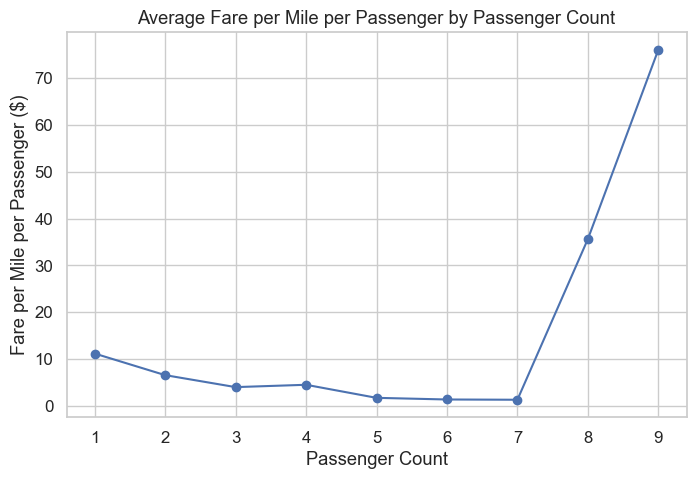

In [168]:
# Analyse the fare per mile per passenger for different passenger counts

df_trips['fare_amount'] = pd.to_numeric(df_trips['fare_amount'], errors='coerce')
df_trips['trip_distance'] = pd.to_numeric(df_trips['trip_distance'], errors='coerce')
df_trips['passenger_count'] = pd.to_numeric(df_trips['passenger_count'], errors='coerce')

df_valid = df_trips[
    (df_trips['fare_amount'] > 0) &
    (df_trips['trip_distance'] > 0) &
    (df_trips['passenger_count'] > 0)
]

df_valid['fare_per_mile_per_passenger'] = (
    df_valid['fare_amount'] / df_valid['trip_distance']
) / df_valid['passenger_count']

fare_analysis = df_valid.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

fare_analysis = fare_analysis.sort_values(by='passenger_count')

print("Fare per mile per passenger by passenger count:")
print(fare_analysis)

plt.figure(figsize=(8, 5))
plt.plot(fare_analysis['passenger_count'], fare_analysis['fare_per_mile_per_passenger'], marker='o')
plt.title('Average Fare per Mile per Passenger by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare per Mile per Passenger ($)')
plt.grid(True)
plt.xticks(fare_analysis['passenger_count'])  # Show actual counts on x-axis
plt.show()


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

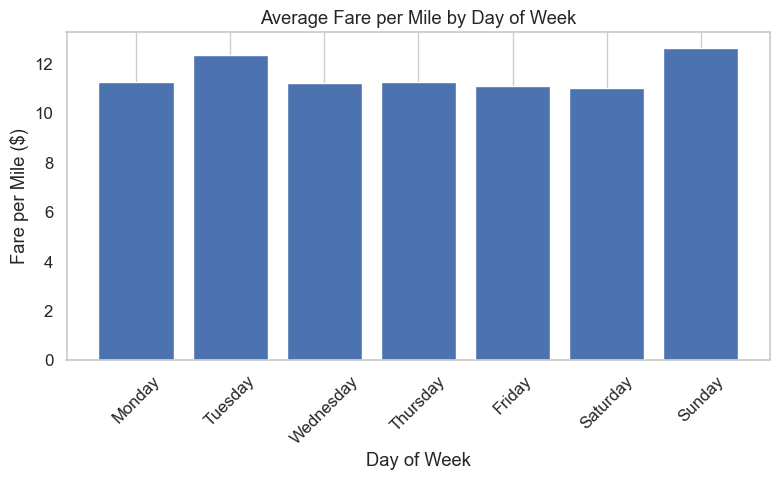

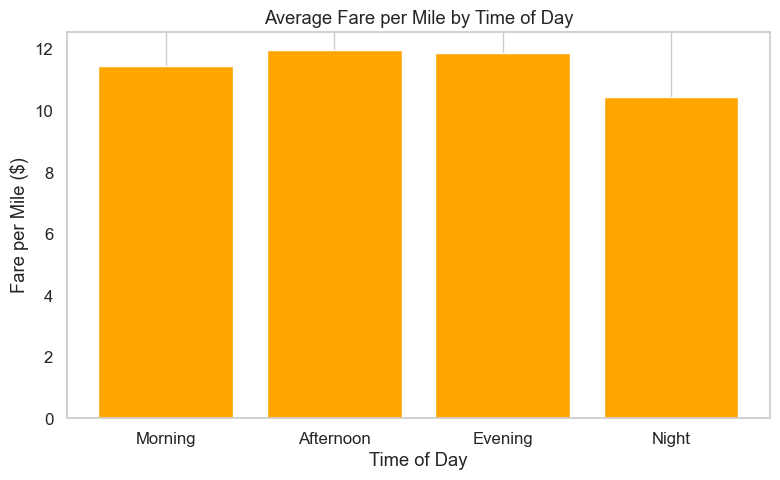

In [ ]:
# Compare the average fare per mile for different days and for different times of the day

df_trips['tpep_pickup_datetime'] = pd.to_datetime(df_trips['tpep_pickup_datetime'])


df_trips['fare_per_mile'] = df_trips['fare_amount'] / df_trips['trip_distance']


df_clean = df_trips[
    (df_trips['fare_amount'] > 0) &
    (df_trips['trip_distance'] > 0)
].copy()


df_clean['day_of_week'] = df_clean['tpep_pickup_datetime'].dt.dayofweek  # 0 = Monday
df_clean['hour'] = df_clean['tpep_pickup_datetime'].dt.hour


def get_time_of_day(hour):
    if 5 <= hour < 11:
        return 'Morning'
    elif 11 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df_clean['time_of_day'] = df_clean['hour'].apply(get_time_of_day)

# --- Average Fare per Mile by Day of Week ---
avg_fare_by_day = df_clean.groupby('day_of_week')['fare_per_mile'].mean().reset_index()
avg_fare_by_day['day_of_week'] = avg_fare_by_day['day_of_week'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})

# --- Average Fare per Mile by Time of Day ---
avg_fare_by_time = df_clean.groupby('time_of_day')['fare_per_mile'].mean().reset_index()

# Sort time of day in logical order
time_order = ['Morning', 'Afternoon', 'Evening', 'Night']
avg_fare_by_time['time_of_day'] = pd.Categorical(avg_fare_by_time['time_of_day'], categories=time_order, ordered=True)
avg_fare_by_time = avg_fare_by_time.sort_values('time_of_day')

# --- Plot: Fare per Mile by Day ---
plt.figure(figsize=(8, 5))
plt.bar(avg_fare_by_day['day_of_week'], avg_fare_by_day['fare_per_mile'])
plt.title('Average Fare per Mile by Day of Week')
plt.ylabel('Fare per Mile ($)')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# --- Plot: Fare per Mile by Time of Day ---
plt.figure(figsize=(8, 5))
plt.bar(avg_fare_by_time['time_of_day'], avg_fare_by_time['fare_per_mile'], color='orange')
plt.title('Average Fare per Mile by Time of Day')
plt.ylabel('Fare per Mile ($)')
plt.xlabel('Time of Day')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

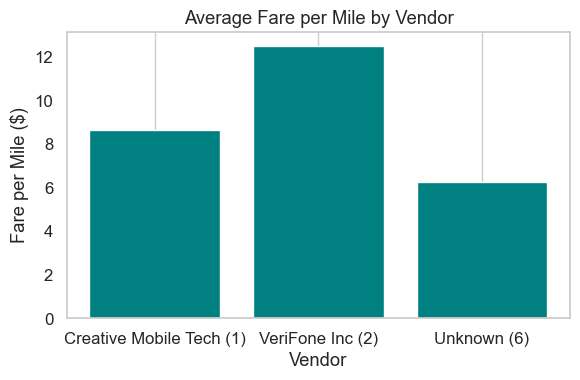

In [178]:
# Compare fare per mile for different vendors
df_trips['fare_amount'] = pd.to_numeric(df_trips['fare_amount'], errors='coerce')
df_trips['trip_distance'] = pd.to_numeric(df_trips['trip_distance'], errors='coerce')

# Compute fare per mile
df_trips['fare_per_mile'] = df_trips['fare_amount'] / df_trips['trip_distance']

# Remove invalid data
df_clean = df_trips[
    (df_trips['fare_amount'] > 0) &
    (df_trips['trip_distance'] > 0) &
    (df_trips['VendorID'].notna())
].copy()

# Group by VendorID
fare_by_vendor = df_clean.groupby('VendorID')['fare_per_mile'].mean().reset_index()

# Map known vendors, and fallback to ID if unknown
vendor_names = {1: 'Creative Mobile Tech (1)', 2: 'VeriFone Inc (2)'}
fare_by_vendor['Vendor'] = fare_by_vendor['VendorID'].apply(lambda x: vendor_names.get(x, f'Unknown ({int(x)})'))

# Plot
plt.figure(figsize=(6, 4))
plt.bar(fare_by_vendor['Vendor'], fare_by_vendor['fare_per_mile'], color='teal')
plt.title('Average Fare per Mile by Vendor')
plt.ylabel('Fare per Mile ($)')
plt.xlabel('Vendor')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [179]:
# Defining distance tiers
def classify_distance(distance):
    if distance < 1:
        return 'Very Short (<1 mile)'
    elif distance < 3:
        return 'Short (1-3 miles)'
    elif distance < 7:
        return 'Medium (3-7 miles)'
    elif distance < 15:
        return 'Long (7-15 miles)'
    else:
        return 'Very Long (15+ miles)'

# Apply the function to create a new column
df_clean['distance_tier'] = df_clean['trip_distance'].apply(classify_distance)

# View value counts (optional)
print(df_clean['distance_tier'].value_counts())


distance_tier
Short (1-3 miles)        926733
Very Short (<1 mile)     392775
Medium (3-7 miles)       299542
Long (7-15 miles)        152378
Very Long (15+ miles)     97244
Name: count, dtype: int64


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

/var/folders/4b/2yy31tk96r17nrmlqxttt5kh0000gn/T/ipykernel_2858/1351578866.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='distance_tier', y='tip_percent', data=tip_by_distance, palette='Blues_d')


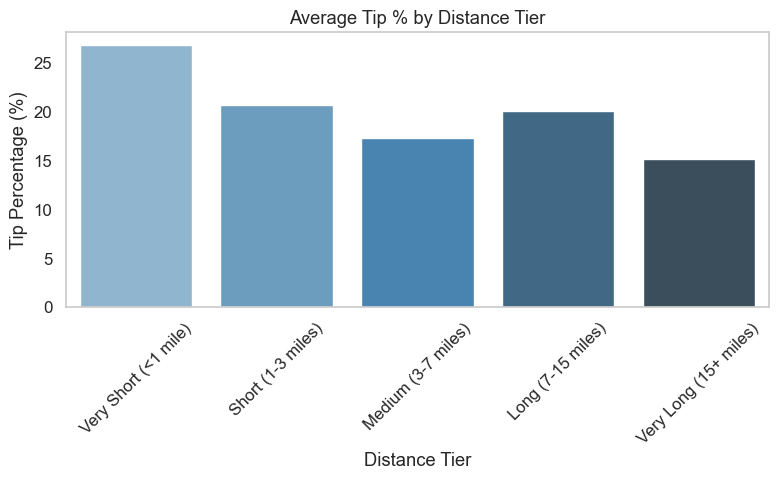

/var/folders/4b/2yy31tk96r17nrmlqxttt5kh0000gn/T/ipykernel_2858/1351578866.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='passenger_count', y='tip_percent', data=tip_by_passenger, palette='Greens_d')


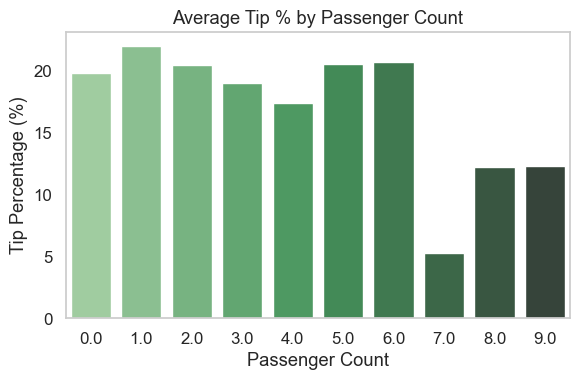

/var/folders/4b/2yy31tk96r17nrmlqxttt5kh0000gn/T/ipykernel_2858/1351578866.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time_of_day', y='tip_percent', data=tip_by_time, palette='Purples_d')


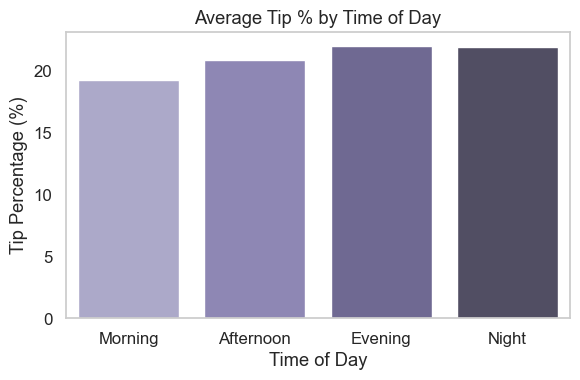

In [183]:
#  Analyze tip percentages based on distances, passenger counts and pickup times


# --- Clean and prepare data ---
df_trips['tip_amount'] = pd.to_numeric(df_trips['tip_amount'], errors='coerce')
df_trips['fare_amount'] = pd.to_numeric(df_trips['fare_amount'], errors='coerce')

# Remove invalid values
df_clean = df_trips[
    (df_trips['fare_amount'] > 0) &
    (df_trips['tip_amount'] >= 0)
].copy()

# Calculate tip percentage
df_clean['tip_percent'] = (df_clean['tip_amount'] / df_clean['fare_amount']) * 100

# --- Distance Tier Classification ---
def classify_distance(distance):
    if distance < 1:
        return 'Very Short (<1 mile)'
    elif distance < 3:
        return 'Short (1-3 miles)'
    elif distance < 7:
        return 'Medium (3-7 miles)'
    elif distance < 15:
        return 'Long (7-15 miles)'
    else:
        return 'Very Long (15+ miles)'

df_clean['distance_tier'] = df_clean['trip_distance'].apply(classify_distance)

# --- Time of Day Classification ---
df_clean['tpep_pickup_datetime'] = pd.to_datetime(df_clean['tpep_pickup_datetime'], errors='coerce')
df_clean['hour'] = df_clean['tpep_pickup_datetime'].dt.hour

def get_time_of_day(hour):
    if 5 <= hour < 11:
        return 'Morning'
    elif 11 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df_clean['time_of_day'] = df_clean['hour'].apply(get_time_of_day)

# --- 1. Average Tip % by Distance Tier ---
tip_by_distance = df_clean.groupby('distance_tier')['tip_percent'].mean().reset_index()
tier_order = ['Very Short (<1 mile)', 'Short (1-3 miles)', 'Medium (3-7 miles)', 'Long (7-15 miles)', 'Very Long (15+ miles)']
tip_by_distance['distance_tier'] = pd.Categorical(tip_by_distance['distance_tier'], categories=tier_order, ordered=True)
tip_by_distance = tip_by_distance.sort_values('distance_tier')

plt.figure(figsize=(8, 5))
sns.barplot(x='distance_tier', y='tip_percent', data=tip_by_distance, palette='Blues_d')
plt.title('Average Tip % by Distance Tier')
plt.ylabel('Tip Percentage (%)')
plt.xlabel('Distance Tier')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# --- 2. Average Tip % by Passenger Count ---
tip_by_passenger = df_clean.groupby('passenger_count')['tip_percent'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='passenger_count', y='tip_percent', data=tip_by_passenger, palette='Greens_d')
plt.title('Average Tip % by Passenger Count')
plt.ylabel('Tip Percentage (%)')
plt.xlabel('Passenger Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# --- 3. Average Tip % by Time of Day ---
tip_by_time = df_clean.groupby('time_of_day')['tip_percent'].mean().reset_index()
time_order = ['Morning', 'Afternoon', 'Evening', 'Night']
tip_by_time['time_of_day'] = pd.Categorical(tip_by_time['time_of_day'], categories=time_order, ordered=True)
tip_by_time = tip_by_time.sort_values('time_of_day')

plt.figure(figsize=(6, 4))
sns.barplot(x='time_of_day', y='tip_percent', data=tip_by_time, palette='Purples_d')
plt.title('Average Tip % by Time of Day')
plt.ylabel('Tip Percentage (%)')
plt.xlabel('Time of Day')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

/var/folders/4b/2yy31tk96r17nrmlqxttt5kh0000gn/T/ipykernel_2858/3440771633.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='distance_tier', y='tip_percent', data=tip_by_distance, palette='Blues_d')


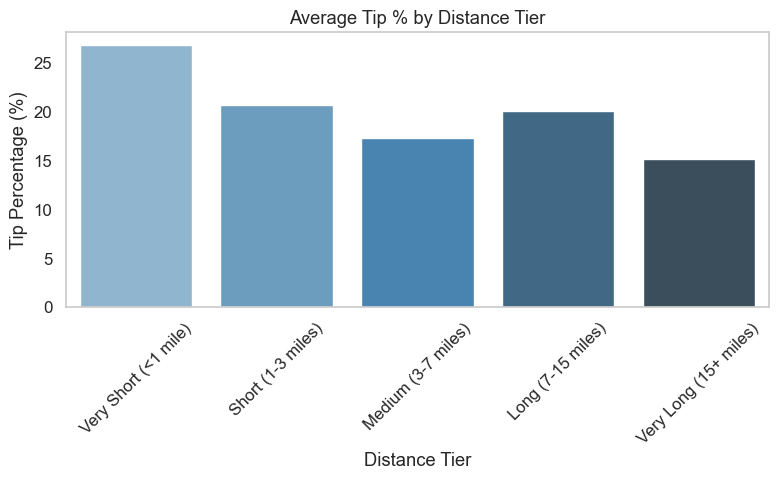

/var/folders/4b/2yy31tk96r17nrmlqxttt5kh0000gn/T/ipykernel_2858/3440771633.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='passenger_count', y='tip_percent', data=tip_by_passenger, palette='Greens_d')


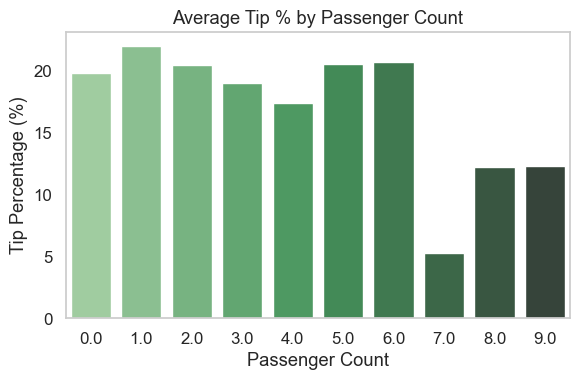

/var/folders/4b/2yy31tk96r17nrmlqxttt5kh0000gn/T/ipykernel_2858/3440771633.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time_of_day', y='tip_percent', data=tip_by_time, palette='Purples_d')


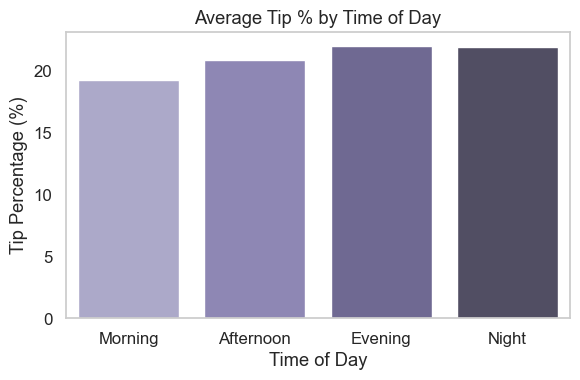

In [182]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%


# --- Clean and prepare data ---
df_trips['tip_amount'] = pd.to_numeric(df_trips['tip_amount'], errors='coerce')
df_trips['fare_amount'] = pd.to_numeric(df_trips['fare_amount'], errors='coerce')

# Remove invalid values
df_clean = df_trips[
    (df_trips['fare_amount'] > 0) &
    (df_trips['tip_amount'] >= 0)
].copy()

# Calculate tip percentage
df_clean['tip_percent'] = (df_clean['tip_amount'] / df_clean['fare_amount']) * 100

# --- Distance Tier Classification ---
def classify_distance(distance):
    if distance < 1:
        return 'Very Short (<1 mile)'
    elif distance < 3:
        return 'Short (1-3 miles)'
    elif distance < 7:
        return 'Medium (3-7 miles)'
    elif distance < 15:
        return 'Long (7-15 miles)'
    else:
        return 'Very Long (15+ miles)'

df_clean['distance_tier'] = df_clean['trip_distance'].apply(classify_distance)

# --- Time of Day Classification ---
df_clean['tpep_pickup_datetime'] = pd.to_datetime(df_clean['tpep_pickup_datetime'], errors='coerce')
df_clean['hour'] = df_clean['tpep_pickup_datetime'].dt.hour

def get_time_of_day(hour):
    if 5 <= hour < 11:
        return 'Morning'
    elif 11 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df_clean['time_of_day'] = df_clean['hour'].apply(get_time_of_day)

# --- 1. Average Tip % by Distance Tier ---
tip_by_distance = df_clean.groupby('distance_tier')['tip_percent'].mean().reset_index()
tier_order = ['Very Short (<1 mile)', 'Short (1-3 miles)', 'Medium (3-7 miles)', 'Long (7-15 miles)', 'Very Long (15+ miles)']
tip_by_distance['distance_tier'] = pd.Categorical(tip_by_distance['distance_tier'], categories=tier_order, ordered=True)
tip_by_distance = tip_by_distance.sort_values('distance_tier')

plt.figure(figsize=(8, 5))
sns.barplot(x='distance_tier', y='tip_percent', data=tip_by_distance, palette='Blues_d')
plt.title('Average Tip % by Distance Tier')
plt.ylabel('Tip Percentage (%)')
plt.xlabel('Distance Tier')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# --- 2. Average Tip % by Passenger Count ---
tip_by_passenger = df_clean.groupby('passenger_count')['tip_percent'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='passenger_count', y='tip_percent', data=tip_by_passenger, palette='Greens_d')
plt.title('Average Tip % by Passenger Count')
plt.ylabel('Tip Percentage (%)')
plt.xlabel('Passenger Count')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# --- 3. Average Tip % by Time of Day ---
tip_by_time = df_clean.groupby('time_of_day')['tip_percent'].mean().reset_index()
time_order = ['Morning', 'Afternoon', 'Evening', 'Night']
tip_by_time['time_of_day'] = pd.Categorical(tip_by_time['time_of_day'], categories=time_order, ordered=True)
tip_by_time = tip_by_time.sort_values('time_of_day')

plt.figure(figsize=(6, 4))
sns.barplot(x='time_of_day', y='tip_percent', data=tip_by_time, palette='Purples_d')
plt.title('Average Tip % by Time of Day')
plt.ylabel('Tip Percentage (%)')
plt.xlabel('Time of Day')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

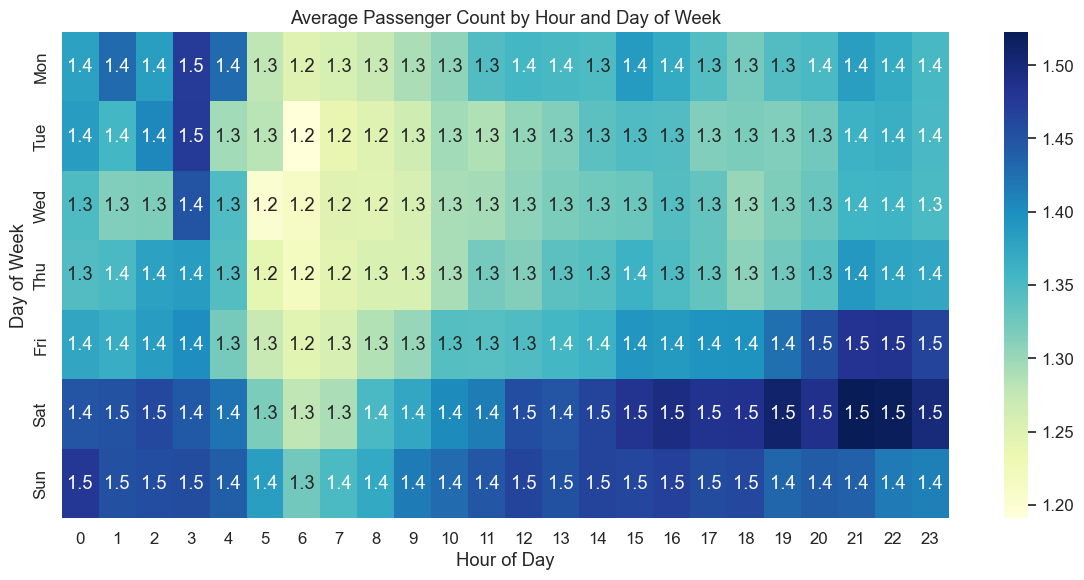

In [184]:
# See how passenger count varies across hours and days

# Ensure datetime column is parsed
df_trips['tpep_pickup_datetime'] = pd.to_datetime(df_trips['tpep_pickup_datetime'], errors='coerce')

# Extract hour and day of week
df_trips['hour'] = df_trips['tpep_pickup_datetime'].dt.hour
df_trips['day_of_week'] = df_trips['tpep_pickup_datetime'].dt.dayofweek

# Map day numbers to names
day_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df_trips['day_name'] = df_trips['day_of_week'].map(day_map)

# Group by day and hour, compute average passenger count
passenger_heatmap = df_trips.groupby(['day_name', 'hour'])['passenger_count'].mean().reset_index()

# Pivot for heatmap
heatmap_data = passenger_heatmap.pivot(index='day_name', columns='hour', values='passenger_count')
heatmap_data = heatmap_data.reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # ordered

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Average Passenger Count by Hour and Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

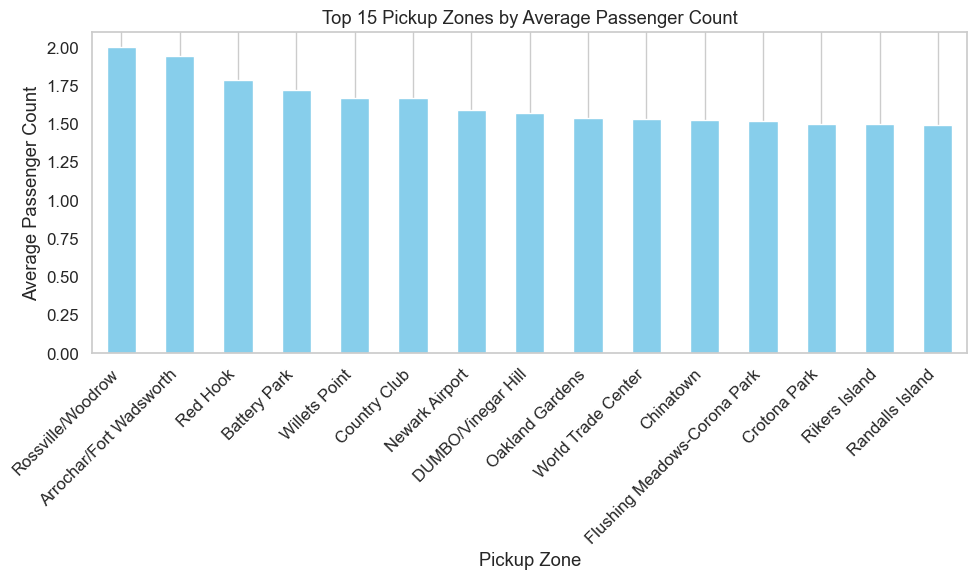

In [191]:
# How does passenger count vary across zones

zones = gpd.read_file('/Users/shubhamkumarsingh/Downloads/Datasets and Dictionary/taxi_zones')  # This is a folder

# Prepare zone lookup from shapefile
zone_lookup = zones[['LocationID', 'zone']].copy()
zone_lookup = zone_lookup.rename(columns={'LocationID': 'PULocationID', 'zone': 'Pickup_Zone'})

# Merge with trip data on pickup location ID
df_trips = df_trips.merge(zone_lookup, on='PULocationID', how='left')

# Group by pickup zone and calculate average passenger count
passengers_by_zone = df_trips.groupby('Pickup_Zone')['passenger_count'].mean().sort_values(ascending=False).head(15)

# Plot the top 15 zones by average passenger count
plt.figure(figsize=(10, 6))
passengers_by_zone.plot(kind='bar', color='skyblue')
plt.title('Top 15 Pickup Zones by Average Passenger Count')
plt.ylabel('Average Passenger Count')
plt.xlabel('Pickup Zone')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()





<Figure size 1200x1000 with 0 Axes>

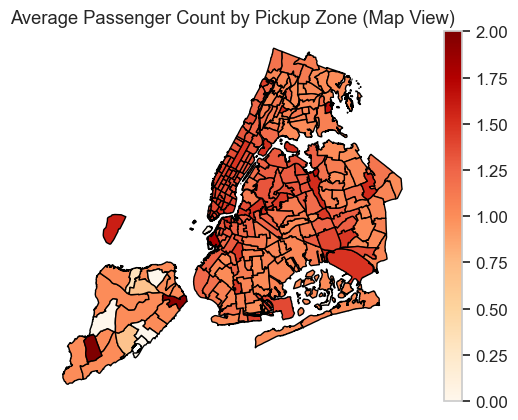

In [192]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
zone_lookup = zones[['LocationID', 'zone', 'geometry']].copy()
zone_lookup = zone_lookup.rename(columns={'LocationID': 'PULocationID', 'zone': 'Pickup_Zone'})

# Merge trip data with zone shapes
zones_with_trips = zone_lookup.merge(df_trips, on='PULocationID', how='left')

# Calculate average passenger count for each zone
avg_passenger_per_zone = zones_with_trips.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_per_zone = avg_passenger_per_zone.rename(columns={'passenger_count': 'avg_passenger_count'})

# Merge back into GeoDataFrame to attach to geometry
zones_with_trips_avg = zone_lookup.merge(avg_passenger_per_zone, on='PULocationID', how='left')

# Fill NaN with 0 (optional)
zones_with_trips_avg['avg_passenger_count'] = zones_with_trips_avg['avg_passenger_count'].fillna(0)

# Plot
plt.figure(figsize=(12, 10))
zones_with_trips_avg.plot(column='avg_passenger_count', cmap='OrRd', legend=True, edgecolor='black')
plt.title('Average Passenger Count by Pickup Zone (Map View)')
plt.axis('off')
plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

Extra Charges Frequency:
extra
-2.50          1
-1.00          3
 0.00     765708
 0.01          1
 0.19          1
 0.25          2
 0.50         15
 0.70          5
 0.75         11
 1.00     367590
 1.05          1
 1.25        911
 1.26          1
 1.50          8
 1.75       3684
 2.00         33
 2.20          2
 2.25        615
 2.45          6
 2.50     466307
 2.75       2411
 3.00         22
 3.20         42
 3.25          9
 3.50     107198
 3.75       1777
 4.05          1
 4.25       6978
 4.50          5
 4.75          7
 5.00     135041
 5.25         23
 5.30          1
 6.00      15804
 6.25        571
 6.75       2686
 7.00          4
 7.25        338
 7.50      16585
 7.75       1597
 8.20          1
 8.50        377
 8.75       1513
 9.25       7050
 9.75        401
 10.00       580
 10.25      1871
 11.00         1
 11.25       301
 11.75      1482
 12.50         3
 13.75         1
 14.25         3
 20.80         1
Name: count, dtype: int64

Congestion Surcharge Fre

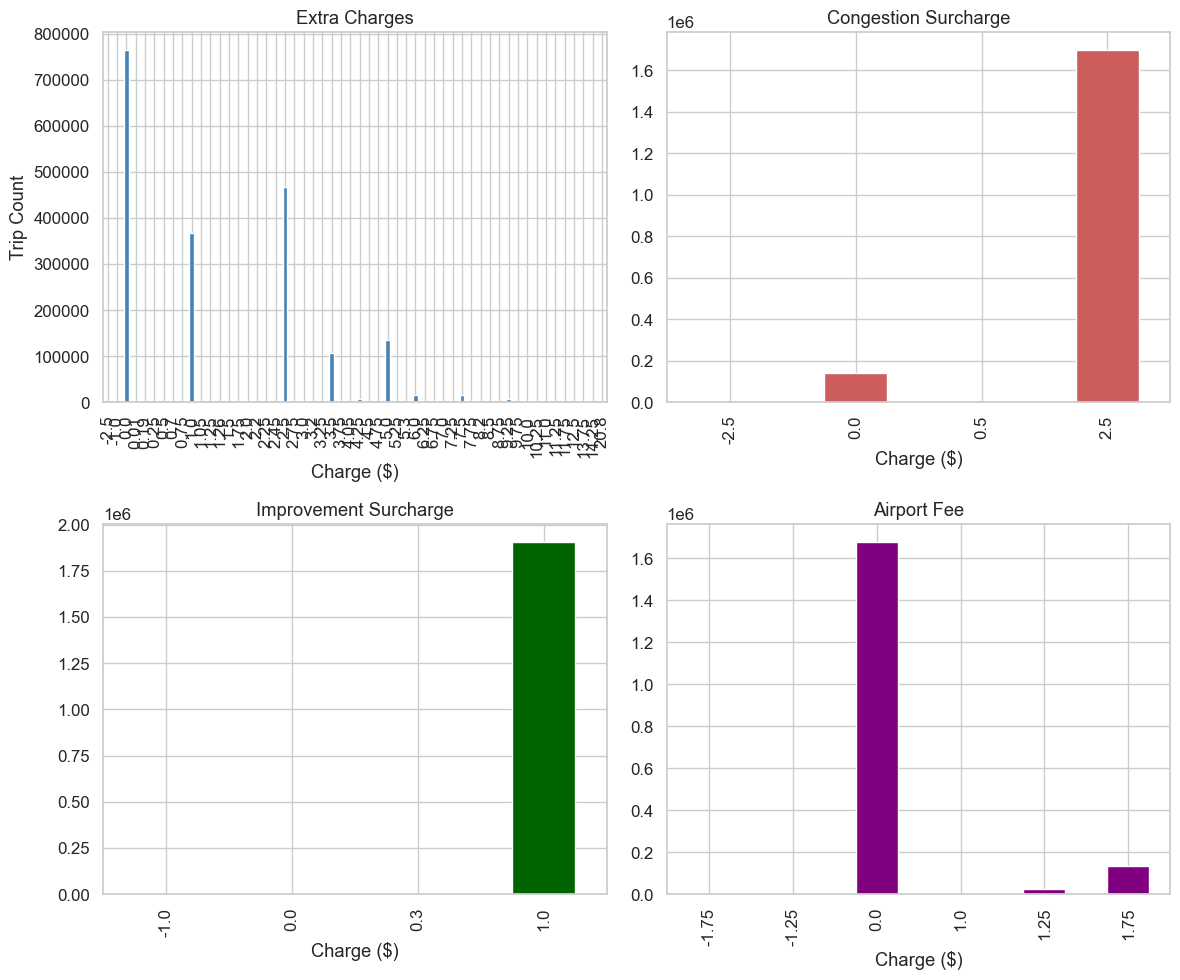

In [195]:
# How often is each surcharge applied?
extra_counts = df_trips['extra'].value_counts().sort_index()
print("Extra Charges Frequency:")
print(extra_counts)

# Congestion surcharge
congestion_counts = df_trips['congestion_surcharge'].value_counts().sort_index()
print("\nCongestion Surcharge Frequency:")
print(congestion_counts)

# Improvement surcharge
improvement_counts = df_trips['improvement_surcharge'].value_counts().sort_index()
print("\nImprovement Surcharge Frequency:")
print(improvement_counts)

# Airport fee
airport_fee_counts = df_trips['Airport_fee'].value_counts().sort_index()
print("\nAirport Fee Frequency:")
print(airport_fee_counts)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

extra_counts.plot(kind='bar', ax=axs[0], color='steelblue', title='Extra Charges')
axs[0].set_xlabel('Charge ($)')
axs[0].set_ylabel('Trip Count')

congestion_counts.plot(kind='bar', ax=axs[1], color='indianred', title='Congestion Surcharge')
axs[1].set_xlabel('Charge ($)')

improvement_counts.plot(kind='bar', ax=axs[2], color='darkgreen', title='Improvement Surcharge')
axs[2].set_xlabel('Charge ($)')

airport_fee_counts.plot(kind='bar', ax=axs[3], color='purple', title='Airport Fee')
axs[3].set_xlabel('Charge ($)')

plt.tight_layout()
plt.show()



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
'''

  - Surge Pricing for High-Tip Scenarios
    - Encourage drivers to operate late at night (10 PM - 2 AM) due to higher tip percentages.
    - Promote cashless transactions to improve driver earnings (higher tipping on card payments).

  - Optimized Routing for Efficiency
    - Avoid high-congestion routes during peak hours (Downtown, Times Square).
    - Suggest alternate routes for to minimize travel time.

  - Data shows that peak demand happens during specific time slots
    - e.g., 1:00 PM – 9:00 PM on weekdays.
    - Idle cabs should be moved to high-demand areas, such as
      - Upper East Side South/North and Midtown Centre just before these hours begin.

  - Offer extra incentives for completing a set number of trips in high-demand areas during peak hours.
    - This will encourage drivers to return to these locations and improve their overall satisfaction.

  - To reduce customer waiting time, prioritize assigning cabs that are within 2 minutes of the high-demand zones.

  - In high-demand areas, instruct cab drivers to wait at well-known locations for better accessibility.

  - Set up a centralized point where drivers can be stationed in high-demand zones.
    - This will assure customers of cab availability at specific locations.

'''

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
'''

- Weekday Mornings (6 AM - 10 AM)
    - High demand in residential areas (Brooklyn, Queens, Upper Manhattan) → Business districts (Midtown, Financial District).
    - Action: Deploy more taxis in Brooklyn & Queens for pickups & redirect them towards Midtown and Lower Manhattan.

- Weekday Evenings (5 PM - 9 PM)
    - Major demand shift from business districts to residential areas.
    - Action: Increase availability at Penn Station, Grand Central, Wall Street, and Times Square for home-bound commuters.

- Late-Night (10 PM - 3 AM) – Weekends & Fridays
    - Demand spikes in nightlife hotspots (Meatpacking District, SoHo, Williamsburg, Lower East Side).
    - Action: Position cabs near clubs, bars, and entertainment venues before peak closing hours (1-3 AM).

- Early Morning (3 AM - 6 AM)
    - High demand for airport-bound rides (JFK, LaGuardia, Newark Airport) and late-night workers.
    - Action: Keep taxis available near hotels, transportation hubs (Penn Station), and 24-hour work districts.

'''

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
'''

1. Time-Based Surge Pricing

Peak Hour Pricing (7-9 AM & 5-7 PM on Weekdays)
    - Increase fares by 10-15% during the busiest hours when passengers rely on taxis due to transit congestion.
    - Target business districts & residential areas where demand is high.
Nighttime & Weekend Pricing (10 PM - 2 AM, Fri & Sat)
    - Higher fares (15-20%) for late-night rides due to fewer drivers and higher tips.
    - Focus on nightlife zones (SoHo, Meatpacking, Williamsburg, Lower East Side).
Early Morning Airport Pricing (3-6 AM)
    - Introduce a "Flat-Rate Premium" for JFK & LaGuardia-bound rides due to steady demand from travelers.
Off-Peak Discounts (2-5 AM & Midday 11 AM - 3 PM)
    - Reduce fares by 5-10% to increase ride volume when demand is lowest.


2. Distance-Based Fare Adjustments

Short Trips (<2 miles) → Increase Base Fare Slightly
    - Increase minimum fare by $0.50 - $1 to make short trips more profitable.
    - Ideal for Midtown, Financial District, and local residential trips.
Medium Trips (2-5 miles) → Keep Competitive Pricing
    - No major adjustments to maintain affordability and ride frequency.
Long Trips (>5 miles) → Lower Per-Mile Rate
    - Reduce per-mile charge slightly (-5%) to make long rides more attractive.
    - Target routes to/from airports & outer boroughs (Bronx, Queens, Staten Island).


3. Zone-Based Pricing Optimization

Premium Zones:
    - Higher fares for high-demand locations:
    - Airports, Midtown, Wall Street, Entertainment Districts.
Discount Zones:
    - Lower fares for low-demand residential areas:
    - Outer Queens, Bronx, Staten Island.


Conclusion: Balanced Pricing for Revenue & Competitiveness
    - Surge pricing during peak hours & events ensures higher revenue when demand is high.
    - Lower per-mile rates for long trips & off-peak discounts encourage more rides.
    - Cash payment fees drive higher electronic transactions & tipping rates.
    - Strategic adjustments ensure affordability while boosting profitability.


Suggestions:
  - Shared Model
    - Implement a shared ride option where up to three passengers can merge trips based on similar pickup and drop locations.
    - Offer a 30% discount per passenger for shared trips.
    - Except during the five busiest hours of the day.
    - In this shared model, consider a fixed fare per kilometer for simplicity.
    - This approach will encourage more people to use cab services during non-peak hours, increasing trip counts and boosting overall revenue.

  - Loyalty Points:
    - Introduce a loyalty points system that customers can redeem for future rides.
    - This will encourage them to choose cabs more frequently.

'''